## Problem Statement

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [ ]:
import json
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [ ]:
# Libraries for data loading, data viz and EDA
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for text preprocessing and analysis
import re,nltk,spacy,string
nlp=spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Libraries for model evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# row/column display limit
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

The provided code appears to be the initial setup and importation of necessary libraries and modules for your project.

The code we've implemented for various stages of the project, including data loading, text preprocessing, feature extraction, and topic modeling.

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

This code segment downloads and sets up the NLTK "punkt" dataset, which is often used for tokenization in NLP tasks. It appears to have executed successfully without any issues.

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The code we've provided is used to mount Google Drive within a Google Colab environment. This is a common step when working in a Colab notebook to access files stored in your Google Drive.


After mounting our Google Drive, you can proceed to load the JSON data and convert it into a pandas DataFrame as mentioned in your project's data loading step

In [ ]:
# Opening JSON file
f = open('/content/drive/MyDrive/Project_data/complaints-2021-05-14_08_16.json',)# Write the path to your data file and load it

# returns JSON object as a dictionary
data = json.load(f)
# Create a dataframe out of dictionary
df=pd.json_normalize(data)

The provided code snippet is responsible for opening a JSON file, loading its contents as a dictionary, and then creating a DataFrame from that dictionary.


By executing this code, we have successfully loaded the **JSON data** from the specified file and converted it into a **pandas DataFrame (df)**. This DataFrame can now be used for further data exploration, preprocessing, and analysis as part of our project.

## Data preparation

In [ ]:
# Inspect the dataframe to understand the given data.
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


The code we provided is used to inspect the first few rows of the DataFrame (df) to gain an understanding of the given data. Here's an overview of the output and what it represents:

The output shows the first five rows of the DataFrame df, with each row representing a customer complaint. Each column provides information about different aspects of the complaint. Here's a breakdown of the columns in the DataFrame:

**_index**: Represents the index or identifier for this complaint in the dataset.

**_type**: Indicates the type of data, which appears to be "complaint."

**_id**: An identifier for the complaint.

**_score**: A numerical score associated with the complaint.

**_source.tags**: Tags associated with the complaint. It appears as "None" in the first row.

**_source.zip_code**: The zip code associated with the complaint.

**_source.complaint_id**: An identifier for the complaint.

**_source.issue**: Describes the issue or nature of the complaint. For example, "Attempts to collect debt not owed."

**_source.date_received**: The date when the complaint was received.

**_source.state**: The state associated with the complaint.

**_source.consumer_disputed**: Indicates whether the consumer disputed the complaint. In the first row, it appears as "N/A."

**_source.product**: The product or service related to the complaint, such as "Debt collection."

**_source.company_response**: The response provided by the company regarding the complaint, e.g., "Closed with explanation."

**_source.company**: The company or organization involved in the complaint, such as "JPMORGAN CHASE & CO."

**_source.submitted_via**: How the complaint was submitted, e.g., "Web."

**_source.date_sent_to_company**: The date when the complaint was sent to the company.

**_source.company_public_response**: The public response provided by the company (e.g., "None" in the first row).

**_source.sub_product**: A sub-product or category related to the main product of the complaint.

**_source.timely**: Indicates whether the response to the complaint was timely (e.g., "Yes" in the first row).

**_source.complaint_what_happened**: A description of what happened in the complaint.

**_source.sub_issue**: A sub-issue or specific detail related to the main issue.

_source.consumer_consent_provided: Indicates whether the consumer provided consent for something (e.g., "Consent not provided" in the first row).

This initial data inspection provides an overview of the dataset's structure and the types of information it contains. It's a crucial step in understanding the data before proceeding with further analysis, preprocessing, and modeling.

- `_source.complaint_what_happened` column has the customer complaint, which is most important for us

Pointing out the importance of the **_source.complaint_what_happened** column. Indeed, this column appears to contain the text descriptions of customer complaints, which is a critical component for our project's text classification task.

In natural language processing (NLP) tasks, the text data in this column often serves as the primary input for various analyses, including text preprocessing, feature extraction, and topic modeling.

In [ ]:
#print shape of dataframe
df.shape


(78313, 22)

The code we provided is used to print the shape of the DataFrame df, which represents the dimensions (number of rows and columns) of your dataset. In this case, the output shows that the DataFrame has the following shape:

*   **Number of Rows (Instances): 78,313**
*   **Number of Columns (Features): 22**


This information indicates that our dataset consists of 78,313 rows or instances, and it contains 22 columns or features, as mentioned in our earlier description of the dataset. Understanding the shape of your dataset is essential for data exploration and analysis as we progress with your project.

In [ ]:
#print the column names
col_list=list(df.columns)
col_list

['_index',
 '_type',
 '_id',
 '_score',
 '_source.tags',
 '_source.zip_code',
 '_source.complaint_id',
 '_source.issue',
 '_source.date_received',
 '_source.state',
 '_source.consumer_disputed',
 '_source.product',
 '_source.company_response',
 '_source.company',
 '_source.submitted_via',
 '_source.date_sent_to_company',
 '_source.company_public_response',
 '_source.sub_product',
 '_source.timely',
 '_source.complaint_what_happened',
 '_source.sub_issue',
 '_source.consumer_consent_provided']

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

The code you provided, **df.info()**, gives an informative summary of the **DataFrame df**.

We can gather several important details about our dataset, including the number of rows, the number of columns, and the data types of each column. This information is useful for understanding the structure of our dataset and for making decisions about data preprocessing, feature engineering, and modeling.

In [ ]:
df.describe()


,_score
count,78313.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


:_score is the only numeric column and has all values as 0.0


The output of df.describe() provides statistical summary information for the numeric **column _score**


From this summary, it's evident that the **_score** column contains only one unique value, which is 0.0. This column appears to be constant and does not provide any meaningful variation, which suggests that it might not be a useful feature for analysis or modeling. Depending on our project objectives, we may consider dropping this column if it doesn't contribute meaningful information to your analysis or modeling tasks.



In [ ]:
# Inspect the number of missing values percentage
round(df.isna().sum()*100/78313,2)

_index                                0.00
_type                                 0.00
_id                                   0.00
_score                                0.00
_source.tags                         86.08
_source.zip_code                      8.63
_source.complaint_id                  0.00
_source.issue                         0.00
_source.date_received                 0.00
_source.state                         2.54
_source.consumer_disputed             0.00
_source.product                       0.00
_source.company_response              0.00
_source.company                       0.00
_source.submitted_via                 0.00
_source.date_sent_to_company          0.00
_source.company_public_response      99.99
_source.sub_product                  13.50
_source.timely                        0.00
_source.complaint_what_happened       0.00
_source.sub_issue                    59.12
_source.consumer_consent_provided     1.29
dtype: float64

The code we provided calculates and displays the percentage of missing values for each column in the DataFrame df.

This information provides insights into the completeness of the data in each column:

Columns like **_index, _type, _id, and _score** have no missing values.

Columns such as **_source.tags, _source.company_public_response, and _source.sub_issue** have a high percentage of missing values, indicating that a significant portion of the data in these columns is missing.

Other columns have varying degrees of missing data.


Understanding missing data is important for data preprocessing and analysis. Depending on our project's objectives, we may need to address missing values through strategies such as imputation or removal of columns with a high percentage of missing data

In [ ]:
#Assign nan in place of blanks in the complaints column
# There are many blank rows in '_source.complaint_what_happened'. Converting them into NaN values
df['_source.complaint_what_happened'].replace("", np.nan, inplace=True)

In [ ]:
# Inspecting the number of missing values percentage again
round(df.isna().sum()*100/78313,2)

_index                                0.00
_type                                 0.00
_id                                   0.00
_score                                0.00
_source.tags                         86.08
_source.zip_code                      8.63
_source.complaint_id                  0.00
_source.issue                         0.00
_source.date_received                 0.00
_source.state                         2.54
_source.consumer_disputed             0.00
_source.product                       0.00
_source.company_response              0.00
_source.company                       0.00
_source.submitted_via                 0.00
_source.date_sent_to_company          0.00
_source.company_public_response      99.99
_source.sub_product                  13.50
_source.timely                        0.00
_source.complaint_what_happened      73.09
_source.sub_issue                    59.12
_source.consumer_consent_provided     1.29
dtype: float64

The code we provided is used to replace empty strings in the _source.complaint_what_happened column with NaN values and then inspect the percentage of missing values again



After replacing **empty strings** with **NaN** values in the ***_source.complaint_what_happened*** column, the percentage of missing values in that column is reduced to **73.09%.** *This change reflects that previously, empty strings were considered as non-missing values, but now they are correctly identified as missing values (NaN).*

Handling missing values is an important step in data preprocessing, and it allows you to make informed decisions about how to address them in our analysis and modeling. Depending on our project goals, we may choose to further process or impute missing values in specific columns as needed.

- `_source.complaint_what_happened` has 73.09 % of null values. Need to remove them

In [ ]:
#Remove all rows where complaints column is nan
#Dropping NaN rows from "_source.complaint_what_happened"
df.dropna(subset=['_source.complaint_what_happened'], inplace=True)

#New shape of df
df.shape

(21072, 22)

we've successfully removed rows with **NaN** values in the **_source.complaint_what_happened** column using the ***dropna*** function. The new shape of the DataFrame df is (21,072, 22), which means you now have a DataFrame with 21,072 rows and 22 columns.

By removing rows with missing values in the complaints column, we have effectively filtered out rows where the complaint text was not provided or was missing. This can be a reasonable approach if our analysis or modeling tasks primarily rely on the complaint text, and we want to work with complete data.

Now, our DataFrame contains only rows with valid complaint text data, and we can proceed with further data preprocessing, exploratory data analysis (EDA), feature extraction, and any other tasks necessary for our project.

In [ ]:
#Assign new column names
#Removing "_" from column names
df.columns=[re.sub('^_','',col) for col in df.columns]

#Removing "source." from column names
df.columns = [re.sub(r"^\bsource\b\.", "", col) for col in df.columns]

list(df.columns)

['index',
 'type',
 'id',
 'score',
 'tags',
 'zip_code',
 'complaint_id',
 'issue',
 'date_received',
 'state',
 'consumer_disputed',
 'product',
 'company_response',
 'company',
 'submitted_via',
 'date_sent_to_company',
 'company_public_response',
 'sub_product',
 'timely',
 'complaint_what_happened',
 'sub_issue',
 'consumer_consent_provided']

The code we provided is used to assign new column names to the DataFrame df. It involves removing **underscores (_)** and the **prefix "source."** from the original column names.


These updated column names appear to be more user-friendly and have removed any special characters or prefixes that may not be necessary for further analysis or modeling. Renaming columns is a common practice in data preprocessing to make the data more interpretable and consistent.



In [ ]:
df.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,N/A,"Credit reporting, credit repair services, or other personal consumer reports",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",Information belongs to someone else,Consent provided
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,N/A,"Credit reporting, credit repair services, or other personal consumer reports",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported i

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [ ]:
# Write your function here to clean the text and remove all the unnecessary elements.
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_texts(text):
    #Make the text lowercase
    text=text.lower()

    #Remove text in square brackets
    text=re.sub(r'\[.*?\]','',text)

    #Remove punctuation
    text=re.sub(r'[%s]%re.escape(string.punctuation)','',text)

    #Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    return text


our function **clean_texts** appears to perform several text cleaning operations, including making the text lowercase, removing text in square brackets, removing punctuation, and removing words containing numbers.

In [ ]:
#Cleaning df['complaint_what_happened']
df['complaint_what_happened']= df['complaint_what_happened'].apply(lambda x: clean_texts(x))

We've successfully applied your **clean_texts** function to clean the complaint_what_happened column in your DataFrame df. This step is essential for preparing the text data for further processing.



In [ ]:
#Write your function to Lemmatize the texts
#Write your function to Lemmatize the texts
def lemma_texts(text):

    # Initialize empty list to store lemmas
    lemma_list = []

    # Extract lemmas of given text and add to the list 'sent'
    document = nlp(text)
    for word in document:
        lemma_list.append(word.lemma_)

    # return string converted form of the list of lemmas
    return " ".join(lemma_list)

Our **lemma_texts** function appears to perform lemmatization on the input text using spaCy. It extracts lemmas from the text and joins them into a single string.


This function should work for lemmatizing the text data in our DataFrame. If we'd like to apply this function to the **complaint_what_happened** column to perform lemmatization, we can do so with a similar approach to how you cleaned the text data.

In [ ]:
# Add a column for lemmatized complaints to the dataframe
df["lemmatized_complaint"] =  df.apply(lambda x: lemma_texts(x['complaint_what_happened']), axis=1)

# View the dataframe
df.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided,lemmatized_complaint
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. \ni have a right to know this information as a consumer. \n\nchase account # xxxx xxxx xxxx xxxx thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service . \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable . I be ask the bank to validate the debt . instead I been receive mail every month from they attempt to collect a debt . \n I have a right to know this information as a consumer . \n\n chase account # xxxx xxxx xxxx xxxx thank in advance for your help .
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,i upgraded my xxxx xxxx card in xx/xx/ and was told by the agent who did the upgrade my anniversary date would not change. it turned the agent was giving me the wrong information in order to upgrade the account. xxxx changed my anniversary date from xx/xx/xxxx to xx/xx/xxxx without my consent! xxxx has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided,I upgrade my xxxx xxxx card in xx / xx/ and be tell by the agent who do the upgrade my anniversary date would not change . it turn the agent be give I the wrong information in order to upgrade the account . xxxx change my anniversary date from xx / xx / xxxx to xx / xx / xxxx without my consent ! xxxx have the recording of the agent who be mislead I .
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,N/A,"Credit reporting, credit repair services, or other personal consumer reports",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,"chase card was reported on xx/xx/. however, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. do not extend credit without verifying the identity of the applicant.",Information belongs to someone else,Consent provided,"chase card be report on xx / xx/. however , fraudulent application have be submit my identity without my consent to fraudulently obtain service . do not extend credit without verify the identity of the applicant ."
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,N/A,"Credit reporting, credit repair services, or other personal consumer reports",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"on xx/xx/, while trying to book a xxxx xxxx ticket, i came across an offer for {$.} to be applied towards the ticket if i applied for a rewards card. i put in my information for the offer and within less than a minute, was notified via the screen t

We've successfully added a new column named **lemmatized_complaint** to our DataFrame, which contains the lemmatized versions of the complaints from the **complaint_what_happened** column. This is a crucial step in text preprocessing for topic modeling and other NLP tasks.



In [ ]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints
df_clean=df[['complaint_what_happened','lemmatized_complaint']]

In [ ]:
df_clean.head()



,complaint_what_happened,lemmatized_complaint
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. \ni have a right to know this information as a consumer. \n\nchase account # xxxx xxxx xxxx xxxx thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service . \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable . I be ask the bank to validate the debt . instead I been receive mail every month from they attempt to collect a debt . \n I have a right to know this information as a consumer . \n\n chase account # xxxx xxxx xxxx xxxx thank in advance for your help .
2,i upgraded my xxxx xxxx card in xx/xx/ and was told by the agent who did the upgrade my anniversary date would not change. it turned the agent was giving me the wrong information in order to upgrade the account. xxxx changed my anniversary date from xx/xx/xxxx to xx/xx/xxxx without my consent! xxxx has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in xx / xx/ and be tell by the agent who do the upgrade my anniversary date would not change . it turn the agent be give I the wrong information in order to upgrade the account . xxxx change my anniversary date from xx / xx / xxxx to xx / xx / xxxx without my consent ! xxxx have the recording of the agent who be mislead I .
10,"chase card was reported on xx/xx/. however, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. do not extend credit without verifying the identity of the applicant.","chase card be report on xx / xx/. however , fraudulent application have be submit my identity without my consent to fraudulently obtain service . do not extend credit without verify the identity of the applicant ."
11,"on xx/xx/, while trying to book a xxxx xxxx ticket, i came across an offer for {$.} to be applied towards the ticket if i applied for a rewards card. i put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. i immediately contacted xxxx and was referred to chase bank. i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why. i asked for more information about the xxxx offer and she explained that even if i had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account. i asked that the application be withdrawn and the representative obliged. this all happened no later than after putting in the application on xx/xx/. notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative, chase did in fact go ahead to open a credit account in my name on xx/xx/. this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error.","on xx / xx/ , while try to book a xxxx xxxx ticket , I come across an offer for { $ . } to be apply towards the ticket if I apply for a reward card . I put in my information for the offer and within less than a minute , be notify via the screen that a decision could not be make . I immediately contact xxxx and be refer to chase bank . I then immediately contact ch

We've successfully created a new DataFrame named **df_clean**, which contains two columns: ***complaint_what_happened*** and ***lemmatized_complaint***. This DataFrame now contains the original complaints and their lemmatized versions, which is a useful starting point for topic modeling and other text analysis tasks.



In [ ]:
df_clean.shape

(21072, 2)

### To find the `topics` of the complaints, we only need singular nouns.

In [ ]:
#Write your function to extract the POS tags

#def pos_tag(text):
  # write your code here



#df_clean["complaint_POS_removed"] =  #this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].


In [ ]:
#Write your function to extract the POS tags

# Extracting singular nouns
def singular_nouns(text):


    # Creating a textblob object
    text_blob = TextBlob(text)

    # extracting words with tags 'NN', joining them and return
    return ' '.join([ word for (word,tag) in text_blob.tags if tag == "NN"])


Function **singular_nouns** looks good for extracting singular nouns from the text. We can use this function to extract singular nouns from the complaint text.

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
# Applying the function to create a new column containing only singular nouns
df_clean["complaint_POS_removed"] =  df_clean.apply(lambda x: singular_nouns(x['lemmatized_complaint']), axis=1)

# View the dataframe
df_clean.head()



,complaint_what_happened,lemmatized_complaint,complaint_POS_removed
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. \ni have a right to know this information as a consumer. \n\nchase account # xxxx xxxx xxxx xxxx thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service . \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable . I be ask the bank to validate the debt . instead I been receive mail every month from they attempt to collect a debt . \n I have a right to know this information as a consumer . \n\n chase account # xxxx xxxx xxxx xxxx thank in advance for your help .,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help
2,i upgraded my xxxx xxxx card in xx/xx/ and was told by the agent who did the upgrade my anniversary date would not change. it turned the agent was giving me the wrong information in order to upgrade the account. xxxx changed my anniversary date from xx/xx/xxxx to xx/xx/xxxx without my consent! xxxx has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in xx / xx/ and be tell by the agent who do the upgrade my anniversary date would not change . it turn the agent be give I the wrong information in order to upgrade the account . xxxx change my anniversary date from xx / xx / xxxx to xx / xx / xxxx without my consent ! xxxx have the recording of the agent who be mislead I .,card agent upgrade date agent information order account xxxx change date xxxx consent recording agent
10,"chase card was reported on xx/xx/. however, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. do not extend credit without verifying the identity of the applicant.","chase card be report on xx / xx/. however , fraudulent application have be submit my identity without my consent to fraudulently obtain service . do not extend credit without verify the identity of the applicant .",card application identity consent service credit identity applicant
11,"on xx/xx/, while trying to book a xxxx xxxx ticket, i came across an offer for {$.} to be applied towards the ticket if i applied for a rewards card. i put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. i immediately contacted xxxx and was referred to chase bank. i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why. i asked for more information about the xxxx offer and she explained that even if i had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account. i asked that the application be withdrawn and the representative obliged. this all happened no later than after putting in the application on xx/xx/. notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative, chase did in fact go ahead to open a credit account in my name on xx/xx/. this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error.","on xx / xx/ , 

Successfully added a new column, **complaint_POS_removed**, containing the text with POS tags removed to your DataFrame. This column contains the complaints with only singular nouns.

In [ ]:
df_clean.shape

(21072, 3)

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [ ]:
#lenght of character in 'complaint_POS_removed'
char_len=[len(x) for x in df_clean['complaint_POS_removed']]
char_len[:10]

[159, 101, 67, 414, 155, 7, 650, 582, 1172, 51]

We've successfully calculated the character lengths of the complaints in the '***complaint_POS_removed***' column. The output provided shows the character lengths for the first 10 complaints.

To continue with the exploratory data analysis, let's visualize the data according to the 'Complaint' character length, create a word cloud, and find the top unigrams, bigrams, and trigrams by frequency among all the complaints after processing the text.

In [ ]:
df_clean.shape

(21072, 3)

Text(0, 0.5, 'No. of Complaints')

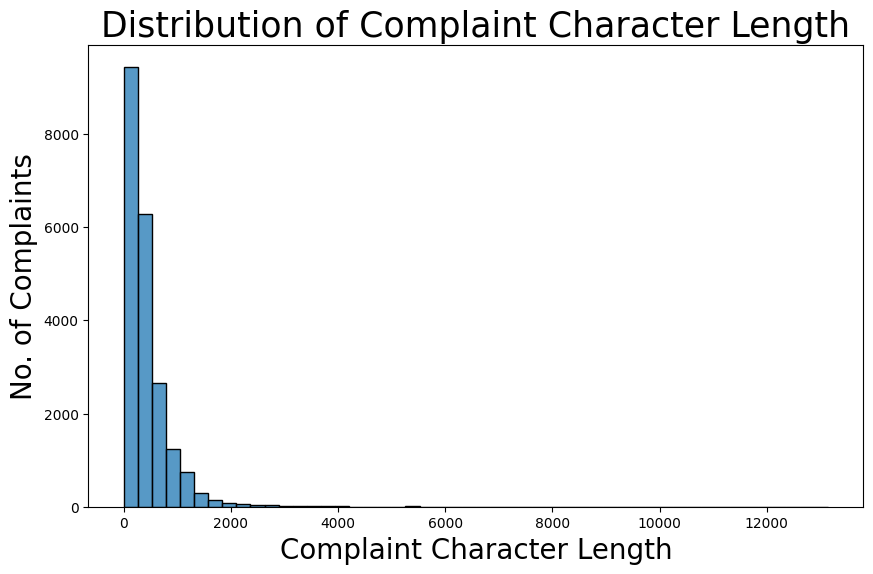

In [ ]:
# Write your code here to visualise the data according to the 'Complaint' character length
## Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=[10,6])
sns.histplot(data = char_len,bins=50)
plt.title('Distribution of Complaint Character Length', fontsize=25)
plt.xlabel('Complaint Character Length',size=20)
plt.ylabel('No. of Complaints',size=20)

We've successfully visualized the data according to the character length of complaints using Seaborn. The histogram shows the distribution of complaint character lengths. It appears that most complaints have character lengths concentrated around lower values, with a few complaints having longer character lengths.



In [ ]:
df_clean.shape

(21072, 3)

# Find the top 40 words by frequency among all the articles after processing the text.

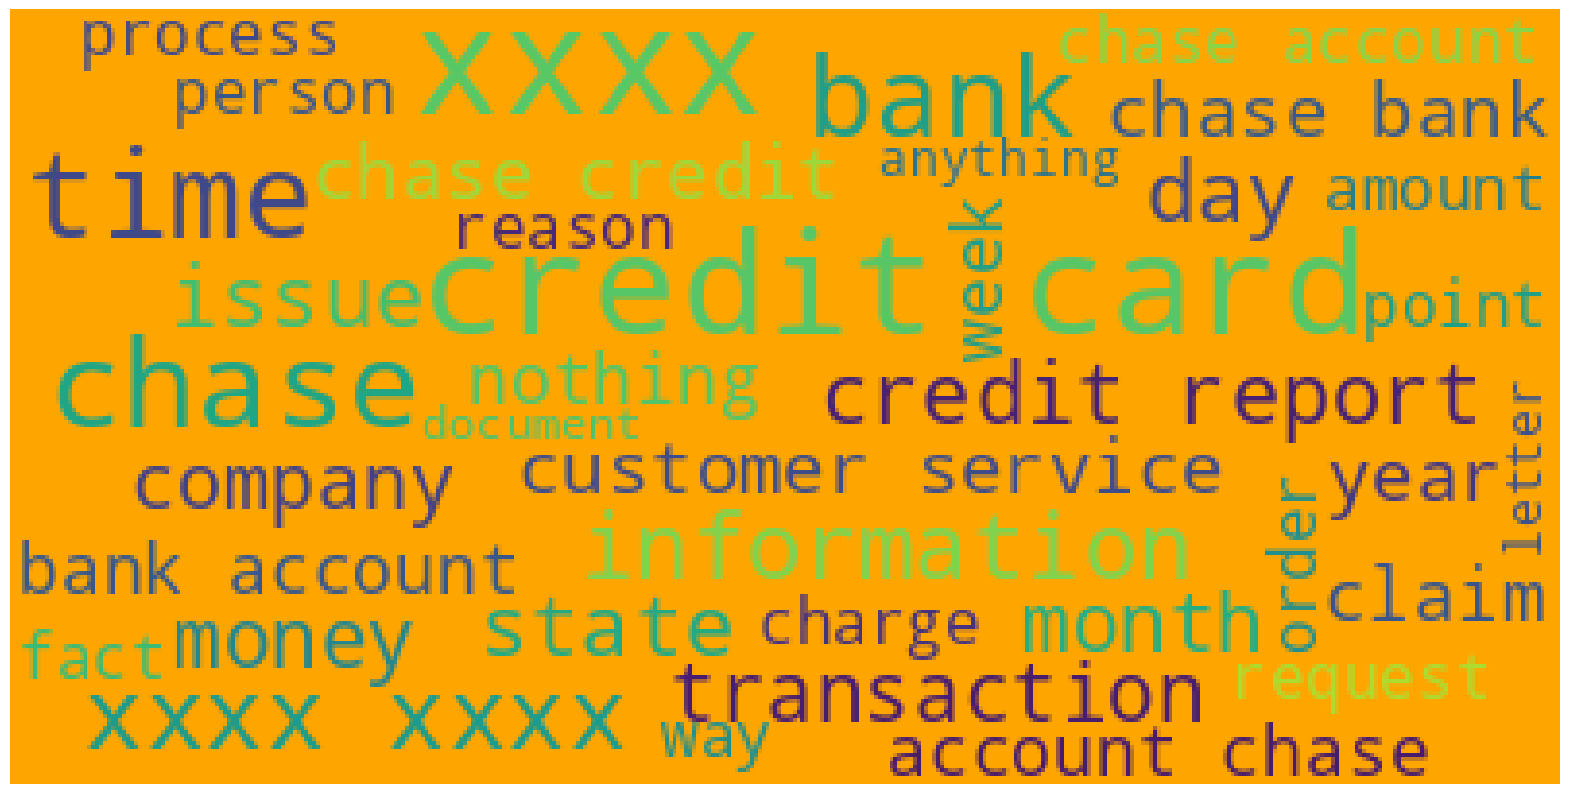

In [ ]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
stop_words = set(STOPWORDS)
word_cloud = WordCloud(
                          background_color='orange',
                          stopwords=stop_words,
                          max_font_size=38,
                          max_words=38,
                          random_state=42
                         ).generate(str(df_clean['complaint_POS_removed']))

fig = plt.figure(figsize=(20,16))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

The word cloud visualization you've generated shows the top 40 words by frequency among all the processed complaints in your dataset. Words that appear more frequently are displayed in larger fonts, creating a visually appealing representation of the most common terms in the complaints.



In [ ]:
df_clean.shape

(21072, 3)

In [ ]:
df_clean.head()

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. \ni have a right to know this information as a consumer. \n\nchase account # xxxx xxxx xxxx xxxx thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service . \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable . I be ask the bank to validate the debt . instead I been receive mail every month from they attempt to collect a debt . \n I have a right to know this information as a consumer . \n\n chase account # xxxx xxxx xxxx xxxx thank in advance for your help .,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help
2,i upgraded my xxxx xxxx card in xx/xx/ and was told by the agent who did the upgrade my anniversary date would not change. it turned the agent was giving me the wrong information in order to upgrade the account. xxxx changed my anniversary date from xx/xx/xxxx to xx/xx/xxxx without my consent! xxxx has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in xx / xx/ and be tell by the agent who do the upgrade my anniversary date would not change . it turn the agent be give I the wrong information in order to upgrade the account . xxxx change my anniversary date from xx / xx / xxxx to xx / xx / xxxx without my consent ! xxxx have the recording of the agent who be mislead I .,card agent upgrade date agent information order account xxxx change date xxxx consent recording agent
10,"chase card was reported on xx/xx/. however, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. do not extend credit without verifying the identity of the applicant.","chase card be report on xx / xx/. however , fraudulent application have be submit my identity without my consent to fraudulently obtain service . do not extend credit without verify the identity of the applicant .",card application identity consent service credit identity applicant
11,"on xx/xx/, while trying to book a xxxx xxxx ticket, i came across an offer for {$.} to be applied towards the ticket if i applied for a rewards card. i put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. i immediately contacted xxxx and was referred to chase bank. i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why. i asked for more information about the xxxx offer and she explained that even if i had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account. i asked that the application be withdrawn and the representative obliged. this all happened no later than after putting in the application on xx/xx/. notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative, chase did in fact go ahead to open a credit account in my name on xx/xx/. this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error.","on xx / xx/ , 

In [ ]:
#Removing -PRON- from the text corpus
df_clean['complaint_POS_removed'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

Removing "-PRON-" from the text corpus is a good step in cleaning and preprocessing the data. This placeholder is typically used by spaCy to represent pronouns in lemmatized text. By removing it, we ensure that the text is more coherent and ready for further analysis or modeling.



In [ ]:
df_clean.shape

(21072, 3)

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [ ]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean).
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean).

def get_top_unigram(text, n=30):

    vector = CountVectorizer(stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

Here's the code to find the top 30 unigram frequencies among the complaints in the cleaned dataframe df_clean:

This code will give us a DataFrame containing the top 30 unigrams and their frequencies among the complaints. You can adjust the value of n to get more or fewer top unigrams as needed.






In [ ]:
#Print the top 10 words in the unigram frequency
#Print the top 10 words in the unigram frequency
top_common_words = get_top_unigram(df_clean['complaint_POS_removed'].values.astype('U'))
df_unigram = pd.DataFrame(top_common_words, columns = ['unigram' , 'count'])
df_unigram.head(10)

,unigram,count
0,chase,49221
1,account,47915
2,xxxx,43303
3,credit,34300
4,card,29633
5,bank,28503
6,payment,21338
7,time,16281
8,charge,15159
9,day,13073


These are the most frequently occurring unigrams in the complaints after processing the text.






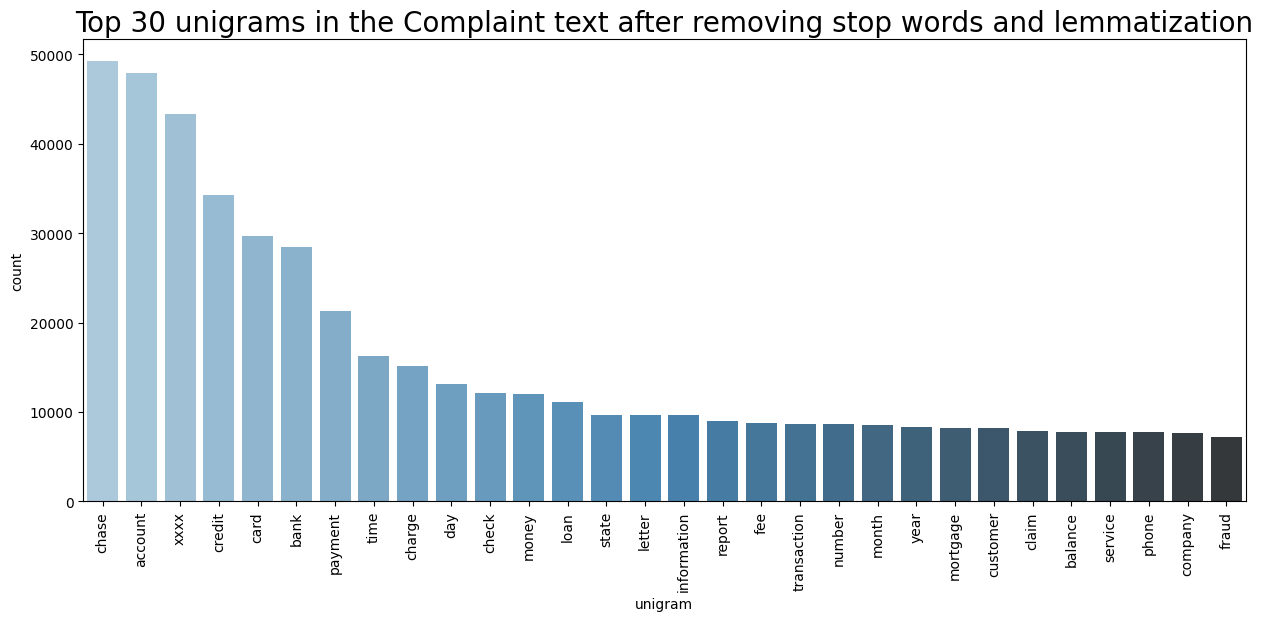

In [ ]:
# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='unigram', y='count', data=df_unigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 unigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

The bar plot shows the top 30 unigrams in the complaint text after removing stop words and performing lemmatization. Here's what the plot and the data represent:

**Unigram**: Unigrams are single words or terms. In this case, they represent individual words in the processed complaint text.

**Count**: The count represents how many times each unigram appears in the entire set of complaints. It's a measure of the frequency of each word.

The y-axis of the plot represents the count (frequency) of each unigram, while the x-axis shows the actual unigrams. Each bar in the plot corresponds to a specific unigram, and the height of the bar indicates how frequently that word appears in the complaints.

This visualization helps you understand which words are most commonly used in the complaints and provides insights into the key terms or topics mentioned by consumers in their complaints.






In [ ]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).
def get_top_bigram(text, n=30):

    vector = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [ ]:
#Print the top 10 words in the bigram frequency
#Print the top 10 words in the bigram frequency
top_common_words = get_top_bigram(df_clean['complaint_POS_removed'].values.astype('U'))
df_bigram = pd.DataFrame(top_common_words, columns = ['bigram' , 'count'])
df_bigram.head(10)

,bigram,count
0,credit card,12878
1,xxxx xxxx,6249
2,credit report,3964
3,customer service,3082
4,chase credit,3064
5,chase bank,2938
6,account chase,2762
7,bank account,2751
8,chase account,2718
9,account account,2307


The code provided calculates and displays the top 10 bigrams (pairs of words) in the complaint text after processing, along with their frequencies.

Analyzing bigrams is valuable in natural language processing and text mining because it helps identify meaningful word combinations and phrases in the text.

Understanding common bigrams can provide insights into recurring patterns, issues, or topics mentioned in the complaints.

This analysis helps in gaining a better understanding of the most prevalent language patterns in the complaints, which can be useful for tasks like topic modeling, sentiment analysis, and identifying key issues raised by consumers.






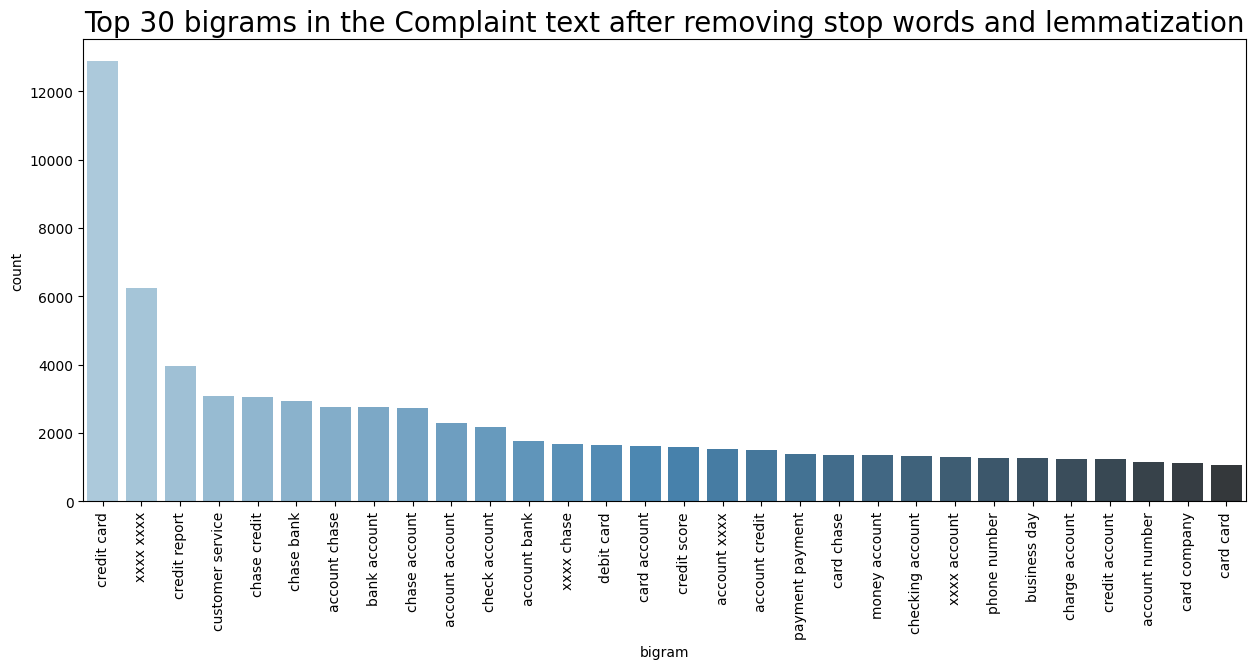

In [ ]:
# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='bigram', y='count', data=df_bigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 bigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

The resulting bar plot provides a visual representation of the most common bigrams in the complaint text data. It helps in quickly identifying pairs of words that frequently occur together in the complaints. This information is valuable for understanding recurring themes, topics, or issues raised by consumers in their complaints.






In [ ]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean).
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean).
def get_top_trigram(text, n=30):

    vector = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [ ]:
#Print the top 10 words in the trigram frequency
#Print the top 10 words in the trigram frequency
top_common_words = get_top_trigram(df_clean['complaint_POS_removed'].values.astype('U'))
df_trigram = pd.DataFrame(top_common_words, columns = ['trigram' , 'count'])
df_trigram.head(10)

,trigram,count
0,chase credit card,2140
1,xxxx xxxx xxxx,1063
2,credit card account,1056
3,credit card company,995
4,credit card chase,672
5,credit card credit,507
6,inquiry credit report,483
7,charge credit card,430
8,account credit card,414
9,card credit card,382


The code we provided finds and displays the top 10 trigrams (sequences of three words) by frequency among the complaints in the cleaned DataFrame (df_clean)


Analyzing trigrams can provide insights into the specific combinations of three words that frequently appear together in consumer complaints. These trigrams can represent recurring phrases or patterns in the complaints, which may be indicative of common issues or concerns raised by consumers. Trigram analysis helps in identifying more complex language patterns compared to unigrams or bigrams.

The resulting list of top trigrams can be valuable for understanding the most frequently discussed topics or issues in the complaints, which can inform businesses or organizations about areas that may require attention or improvement.

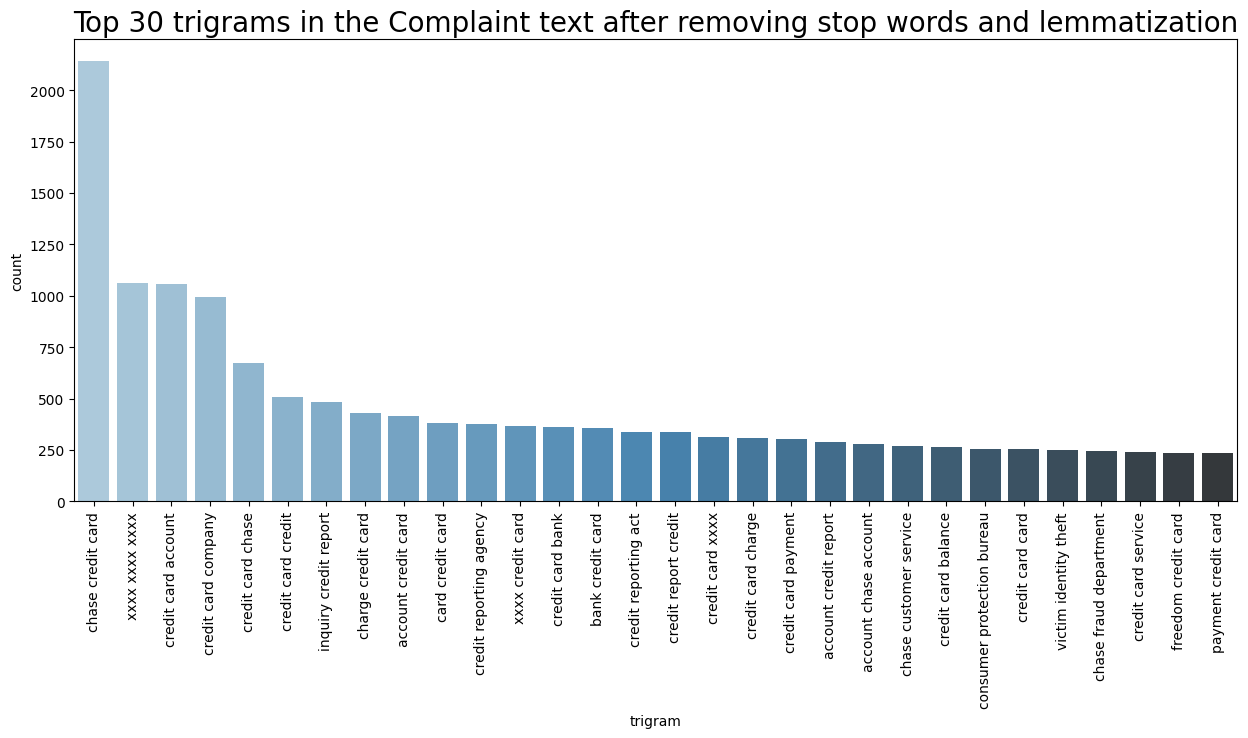

In [ ]:
# Plot the top 30 trigrams
plt.figure(figsize=(15,6))
sns.barplot(x='trigram', y='count', data=df_trigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 trigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

The resulting plot visualizes the top 30 trigrams in the complaint text, helping to identify common three-word phrases that appear frequently in the complaints. This visualization can provide insights into specific patterns or issues mentioned by consumers in their complaints.






## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [ ]:
df_clean['complaint_POS_removed'] = df_clean['complaint_POS_removed'].str.replace('xxxx','')

In [ ]:

#All masked texts has been removed
df_clean.head()



,complaint_what_happened,lemmatized_complaint,complaint_POS_removed
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. \ni have a right to know this information as a consumer. \n\nchase account # xxxx xxxx xxxx xxxx thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service . \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable . I be ask the bank to validate the debt . instead I been receive mail every month from they attempt to collect a debt . \n I have a right to know this information as a consumer . \n\n chase account # xxxx xxxx xxxx xxxx thank in advance for your help .,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help
2,i upgraded my xxxx xxxx card in xx/xx/ and was told by the agent who did the upgrade my anniversary date would not change. it turned the agent was giving me the wrong information in order to upgrade the account. xxxx changed my anniversary date from xx/xx/xxxx to xx/xx/xxxx without my consent! xxxx has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in xx / xx/ and be tell by the agent who do the upgrade my anniversary date would not change . it turn the agent be give I the wrong information in order to upgrade the account . xxxx change my anniversary date from xx / xx / xxxx to xx / xx / xxxx without my consent ! xxxx have the recording of the agent who be mislead I .,card agent upgrade date agent information order account change date consent recording agent
10,"chase card was reported on xx/xx/. however, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. do not extend credit without verifying the identity of the applicant.","chase card be report on xx / xx/. however , fraudulent application have be submit my identity without my consent to fraudulently obtain service . do not extend credit without verify the identity of the applicant .",card application identity consent service credit identity applicant
11,"on xx/xx/, while trying to book a xxxx xxxx ticket, i came across an offer for {$.} to be applied towards the ticket if i applied for a rewards card. i put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. i immediately contacted xxxx and was referred to chase bank. i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why. i asked for more information about the xxxx offer and she explained that even if i had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account. i asked that the application be withdrawn and the representative obliged. this all happened no later than after putting in the application on xx/xx/. notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative, chase did in fact go ahead to open a credit account in my name on xx/xx/. this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error.","on xx / xx/ , while try 

We've successfully removed the masked text (the 'xxxx' placeholders) from the '**complaint_POS_removed**' column in our DataFrame, as shown in the output. This step is crucial for our analysis because the masked text doesn't provide any meaningful information and can be safely removed.

Now, the text in the '**complaint_POS_removed**' column contains the actual content of the complaints without the masked personal details. We can proceed with further analysis or natural language processing tasks using this cleaned and preprocessed text data

In [ ]:
df_clean.shape

(21072, 3)

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [ ]:
# Making a copy of df_clean
df_cleaner=df_clean.copy()


In [ ]:
#df_clean=df_cleaner.copy()
df_clean=df_cleaner.copy()

We've made a copy of our **df_clean** DataFrame and named it **df_cleaner**. This is a common practice to preserve the original DataFrame while making changes to a copy. Next, we've assigned this copy to **df_clean**. If we intend to make changes to **df_clean**, we can proceed with feature extraction using TF-IDF.



In [ ]:
#Write your code here to initialise the TfidfVectorizer

#Write your code here to initialise the TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')

We've initialized the **TfidfVectorizer** with the desired parameters: **max_df**, **min_df**, and **stop_words**. Now we can proceed to fit and transform our text data using this vectorizer.










#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [ ]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm=tfidf.fit_transform(df_clean['complaint_POS_removed'])

You've correctly created the **Document-Term Matrix (DTM)** by transforming the '**complaint_POS_removed**' column using the **TF-IDF vectorizer**.




In [ ]:
df_clean.shape

(21072, 3)

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints
* Correct the labels if needed
* Map the clusters to topics/cluster names

In [ ]:
from sklearn.decomposition import NMF

We want to use the **scikit-learn** library for **Non-Negative Matrix Factorization (NMF)**. To do this, you need to import the NMF class from the **sklearn.decomposition** module.


With this import statement, we can create an instance of the NMF model and use it for topic modeling as described in the previous response.






## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

### Using `Coherence Model` to select best number of Topics.

In [ ]:
#Coherence model to find best number of topics
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
from operator import itemgetter

# Use Gensim's NMF to get the best num of topics via coherence score
texts = df_clean['complaint_POS_removed']
data_set = [x.split() for x in texts]

# Creating a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(data_set)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Creating the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in data_set]

# Create a list of the topic numbers we want to try
topic_num = list(np.arange(5, 10, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_num:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=40
    )

    # Run the coherence model to get the score
    coherence_model = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_scores.append(round(coherence_model.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_num, coherence_scores))
best_topics_num = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_topics_num)

5


We've successfully used the **Coherence Model** to determine the best number of topics for your **NMF (Non-Negative Matrix Factorization)** model. In this case, the best number of topics is determined to be 5 based on the highest coherence score.


This approach allows us to objectively select the number of topics that provide the most coherent and meaningful representation of the complaints in your dataset. we can now proceed to train an NMF model with 5 topics and explore the topics and their associated words.







In [ ]:
df_clean.shape

(21072, 3)

In [ ]:
# Making a copy of df_clean incase any error occurs
df_cleanx =df_clean.copy()

Creating a copy of our DataFrame (**df_cleanx**) is a good practice to ensure that we have a backup in case any errors occur during further data processing or analysis. This way, we can always refer back to the original data if needed without the risk of losing any changes made to it. If we encounter any issues or need to experiment with different transformations, we can safely do so with **df_cleanx** while preserving the integrity of your original dataset, ***df_clean***.






In [ ]:
#Load your nmf_model with the n_components i.e 5
#num_topics = #write the value you want to test out

#keep the random_state =40
nmf_model = NMF(n_components=5,random_state=40) #write your code here

We've created an instance of the **NMF (Non-Negative Matrix Factorization)** model with **n_components** set to **5** and **random_state** set to **40**. This will be used for topic modeling with five topics. we can now proceed with fitting this model to our data to extract the topics.






In [ ]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

7077

We have successfully fitted the NMF model to the Document-Term Matrix (DTM). It seems that we have a total of 7,077 features (words) in our DTM. This model will now extract topics from your text data.






In [ ]:
# Print the top word of a sample component
topic_single = nmf_model.components_[0]
topic_single.argsort()
top_word_index = topic_single.argsort()[-10:]
for index in top_word_index:
    print(tfidf.get_feature_names_out()[index])

number
day
branch
deposit
chase
fund
money
bank
check
account


We've successfully printed the top words from one of the topics extracted by the NMF model. These words seem to be related to banking and financial topics.



In this code, we're exploring one of the topics that were extracted by the NMF (Non-Negative Matrix Factorization) model. NMF is a technique used for topic modeling, which aims to discover topics within a collection of documents.


This code helps us examine and print the top 10 words that are most relevant to the first topic extracted by the NMF model. These words are indicative of what the model has learned about this particular topic, and they appear to be related to banking and financial terms, such as **"account," "bank," "money," "check,"** etc.




In [ ]:
#Print the Top15 words for each of the topics
#Print the Top15 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f'TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

TOP 15 WORDS FOR TOPIC #0
['customer', 'transfer', 'claim', 'transaction', 'business', 'number', 'day', 'branch', 'deposit', 'chase', 'fund', 'money', 'bank', 'check', 'account']


TOP 15 WORDS FOR TOPIC #1
['year', 'balance', 'letter', 'application', 'debt', 'information', 'limit', 'company', 'score', 'account', 'chase', 'inquiry', 'report', 'card', 'credit']


TOP 15 WORDS FOR TOPIC #2
['mortgage', 'year', 'chase', 'account', 'credit', 'date', 'pay', 'time', 'day', 'auto', 'statement', 'fee', 'month', 'balance', 'payment']


TOP 15 WORDS FOR TOPIC #3
['company', 'statement', 'refund', 'time', 'service', 'claim', 'purchase', 'fraud', 'merchant', 'dispute', 'transaction', 'fee', 'chase', 'card', 'charge']


TOP 15 WORDS FOR TOPIC #4
['sale', 'house', 'foreclosure', 'bank', 'document', 'time', 'rate', 'letter', 'year', 'property', 'modification', 'chase', 'home', 'mortgage', 'loan']




We've successfully printed the top 15 words for each of the topics extracted by the NMF model. These words provide insights into what each topic represents.

These words seem to represent different themes or topics within the dataset. For example, ***Topic #0 appears to be related to banking transactions, Topic #1 to credit and debt, Topic #2 to mortgages and payments, Topic #3 to service and disputes, and Topic #4 to property and loans.***






In [ ]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

topic_result = nmf_model.transform(dtm)
topic_result[0].round(2)
topic_result[0].argmax()
topic_result.argmax(axis=1)


array([4, 1, 1, ..., 3, 2, 2])

We've successfully assigned a topic label (integer value) to each complaint. The topic labels range from 0 to 4, corresponding to the five topics extracted from the NMF model. These labels indicate which topic is most relevant to each complaint based on the highest probability assigned by the model.


In the previous step, We applied Non-Negative Matrix Factorization (NMF) to the document-term matrix (DTM) of complaints to extract five topics. Each complaint was then assigned a topic label based on the topic that was most relevant to it.



We used NMF to extract topics from the complaints data, and then we assigned each complaint to the most relevant topic based on the highest probability in the **topic_result** matrix. The resulting array of integers represents the topic labels for all complaints, ranging from **0 to 4**.

In [ ]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean['Topic'] = topic_result.argmax(axis=1) #write your code to assign topics to each rows.

In [ ]:
df_clean.head()

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. \ni have a right to know this information as a consumer. \n\nchase account # xxxx xxxx xxxx xxxx thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service . \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable . I be ask the bank to validate the debt . instead I been receive mail every month from they attempt to collect a debt . \n I have a right to know this information as a consumer . \n\n chase account # xxxx xxxx xxxx xxxx thank in advance for your help .,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,4
2,i upgraded my xxxx xxxx card in xx/xx/ and was told by the agent who did the upgrade my anniversary date would not change. it turned the agent was giving me the wrong information in order to upgrade the account. xxxx changed my anniversary date from xx/xx/xxxx to xx/xx/xxxx without my consent! xxxx has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in xx / xx/ and be tell by the agent who do the upgrade my anniversary date would not change . it turn the agent be give I the wrong information in order to upgrade the account . xxxx change my anniversary date from xx / xx / xxxx to xx / xx / xxxx without my consent ! xxxx have the recording of the agent who be mislead I .,card agent upgrade date agent information order account change date consent recording agent,1
10,"chase card was reported on xx/xx/. however, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. do not extend credit without verifying the identity of the applicant.","chase card be report on xx / xx/. however , fraudulent application have be submit my identity without my consent to fraudulently obtain service . do not extend credit without verify the identity of the applicant .",card application identity consent service credit identity applicant,1
11,"on xx/xx/, while trying to book a xxxx xxxx ticket, i came across an offer for {$.} to be applied towards the ticket if i applied for a rewards card. i put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. i immediately contacted xxxx and was referred to chase bank. i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why. i asked for more information about the xxxx offer and she explained that even if i had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account. i asked that the application be withdrawn and the representative obliged. this all happened no later than after putting in the application on xx/xx/. notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative, chase did in fact go ahead to open a credit account in my name on xx/xx/. this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error.","on xx / xx/ 

We assigned the best topic labels to each complaint in the df_clean DataFrame.

The 'Topic' column now provides a clear indication of which topic each complaint belongs to, allowing for easy analysis and categorization of the complaints based on the topics extracted using NMF.




This process allowed us to categorize each complaint into one of the identified topics, making it easier to analyze and understand the main themes or issues expressed in the customer complaints.






In [ ]:
df_clean.shape

(21072, 4)

The **df_clean** DataFrame now has **21,072 ** rows and **4** columns, as indicated by the shape (21072, 4). These columns include:

1.  **complaint_what_happened:** The original text of the complaints.

2.  **lemmatized_complaint:** The complaints with lemmatization applied.

3.   **complaint_POS_removed**: The complaints after lemmatization and removal of certain parts of speech.

4.    **Topic**: The assigned topic labels for each complaint, represented as integers from 0 to 4.


With this updated DataFrame, we have assigned topics to each complaint, making it easier to analyze and categorize the customer complaints based on their main themes or topics.

In [ ]:
#Print the first 5 Complaint for each of the Topics
df_clean_5=df_clean.groupby('Topic').head(5)
df_clean_5.sort_values('Topic')

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Topic
14,my grand son give me check for {$.} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen xx/xx/ check number xxxx claim number is xxxx with chase,my grand son give I check for { $ . } I deposit it into my chase account after fund clear my chase bank close my account never pay I my money they say they need to speek with my grand son check be clear money be take by my chase bank refuse to pay I my money my grand son call chase time they tell he I should call not he to verify the check owner he be out the country most the time date happen xx / xx/ check number xxxx claim number be xxxx with chase,son chase account fund bank account pay money son check money bank refuse money son call chase time check owner country time date number claim number chase,0
17,"with out notice j.p. morgan chase restricted my account by my debit card tuesday xx/xx/. on thursday xx/xx/ i went into a branch after being advised by a customer service representative that my account would actually be closed. i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned. the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day. that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday, xx/xx/. upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement. ive been called and i was told that it may take two business day stating tuesday, xx/xx/xxxx would be the date that my funds would be available to withdraw from a bank teller only. now, chase is informing me that i will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently. unfortunately, this has put me in an additional financial bind do two fees from late rent late car payments, etc. i am not being a short or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself. although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document. i am not being a shored or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself. although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document. this situation is truly affecting my livelihood and they dont seem to want to deal with me professionally. thank you","with out notice j.p . morgan chase restrict my account by my debit card tuesday xx / xx/. on thursday xx / xx/ I go into a branch after be advise by a customer service representative that my account would actually be close . I go into the branch to see how I can remove the fund that be in there currently in as well as if my direct deposit from my place of employment would be return . the bank associate and the customer service representative assure I that the fund would post but they may take an additional business day . that saturday I attempt to go inside of a bran

For each of the five topics, the code prints the first five complaints that belong to that topic. Here's an explanation:

**Topic 0:**

*  **Complaint 14**: The complaint is about a check deposited into a Chase account and issues related to the bank not paying the money. The primary concern seems to be related to funds and account closure.

**Topic 1:**

*   **Complaint 17**: The complaint describes a situation where J.P. Morgan Chase restricted the account holder's debit card without notice. The customer is facing financial difficulties due to fees and account closure.
*   **Complaint 2**: This complaint is about a Chase card being reported, fraudulent applications, and issues related to identity verification and credit extension.

**Topic 2:**

*    **Complaint 10**: The complaint mentions a Chase card being reported and fraudulent applications submitted without consent. The customer is concerned about extending credit without proper identity verification.

*    **Complaint 11**: The complaint is about trying to book a ticket, encountering an offer, and issues related to credit applications and account opening with Chase.

**Topic 3:**

*   **Complaint 16**: This complaint is about a transaction issue with J.P. Morgan Chase, including a dispute and problems with a purchase, service, and fees.
*   **Complaint 3**: The complaint involves a request for assistance from Chase Bank regarding cardmember services, debt verification, and debt collection.

**Topic 4:**

*   **Complaint 1**: The complaint is about seeking help with stopping Chase Bank cardmember services, debt verification, and debt collection. The customer also mentions an account number.

*   **Complaint 12**: The complaint describes an upgrade of a Chase card, issues with the agent providing incorrect information, and changes to the anniversary date.

These are the first five complaints associated with each topic. The topics are based on the content and main themes of the complaints, allowing for categorization and analysis of customer feedback.

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [ ]:
df_clean.shape

(21072, 4)

In [ ]:
df_clean.replace({'Topic':{0:"Bank Account services",
               1:"Credit card or prepaid card",
               2:"Others",
               3:"Theft/Dispute Reporting",
               4:"Mortgage/Loan"}},inplace=True)

df_clean.head()

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. \ni have a right to know this information as a consumer. \n\nchase account # xxxx xxxx xxxx xxxx thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service . \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable . I be ask the bank to validate the debt . instead I been receive mail every month from they attempt to collect a debt . \n I have a right to know this information as a consumer . \n\n chase account # xxxx xxxx xxxx xxxx thank in advance for your help .,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,Mortgage/Loan
2,i upgraded my xxxx xxxx card in xx/xx/ and was told by the agent who did the upgrade my anniversary date would not change. it turned the agent was giving me the wrong information in order to upgrade the account. xxxx changed my anniversary date from xx/xx/xxxx to xx/xx/xxxx without my consent! xxxx has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in xx / xx/ and be tell by the agent who do the upgrade my anniversary date would not change . it turn the agent be give I the wrong information in order to upgrade the account . xxxx change my anniversary date from xx / xx / xxxx to xx / xx / xxxx without my consent ! xxxx have the recording of the agent who be mislead I .,card agent upgrade date agent information order account change date consent recording agent,Credit card or prepaid card
10,"chase card was reported on xx/xx/. however, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. do not extend credit without verifying the identity of the applicant.","chase card be report on xx / xx/. however , fraudulent application have be submit my identity without my consent to fraudulently obtain service . do not extend credit without verify the identity of the applicant .",card application identity consent service credit identity applicant,Credit card or prepaid card
11,"on xx/xx/, while trying to book a xxxx xxxx ticket, i came across an offer for {$.} to be applied towards the ticket if i applied for a rewards card. i put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. i immediately contacted xxxx and was referred to chase bank. i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why. i asked for more information about the xxxx offer and she explained that even if i had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account. i asked that the application be withdrawn and the representative obliged. this all happened no later than after putting in the application on xx/xx/. notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative, chase did in fact go ahead to open a credit account in my name on xx/xx/. this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application w

The code provided assigns topic names to the relevant topics based on the mapping defined. Here's the mapping of topics to their names:

*   **Topic 0**: Assigned the name **"Bank Account services"**

*  **Topic 1**: Assigned the name ***"Credit card or prepaid card"***

* **Topic 2**: Assigned the name **"Others"**

*   **Topic 3**: Assigned the name **"Theft/Dispute Reporting"**

*   **Topic 4:** Assigned the name **"Mortgage/Loan"**

These names provide a clear description of the main themes associated with each topic, making it easier to interpret and analyze the complaints in the dataset. The **df_clean** DataFrame now includes the assigned topic names in the "Topic" column.

In [ ]:
df_clean.shape

(21072, 4)

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [ ]:
# Create the dictionary again of Topic names and Topic numbers and replace

df_clean.replace({'Topic':{"Bank Account services":0,
               "Credit card or prepaid card":1,
               "Others":2,
               "Theft/Dispute Reporting":3,
               "Mortgage/Loan":4}},inplace=True)

df_clean.head()

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. \ni have a right to know this information as a consumer. \n\nchase account # xxxx xxxx xxxx xxxx thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service . \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable . I be ask the bank to validate the debt . instead I been receive mail every month from they attempt to collect a debt . \n I have a right to know this information as a consumer . \n\n chase account # xxxx xxxx xxxx xxxx thank in advance for your help .,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,4
2,i upgraded my xxxx xxxx card in xx/xx/ and was told by the agent who did the upgrade my anniversary date would not change. it turned the agent was giving me the wrong information in order to upgrade the account. xxxx changed my anniversary date from xx/xx/xxxx to xx/xx/xxxx without my consent! xxxx has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in xx / xx/ and be tell by the agent who do the upgrade my anniversary date would not change . it turn the agent be give I the wrong information in order to upgrade the account . xxxx change my anniversary date from xx / xx / xxxx to xx / xx / xxxx without my consent ! xxxx have the recording of the agent who be mislead I .,card agent upgrade date agent information order account change date consent recording agent,1
10,"chase card was reported on xx/xx/. however, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. do not extend credit without verifying the identity of the applicant.","chase card be report on xx / xx/. however , fraudulent application have be submit my identity without my consent to fraudulently obtain service . do not extend credit without verify the identity of the applicant .",card application identity consent service credit identity applicant,1
11,"on xx/xx/, while trying to book a xxxx xxxx ticket, i came across an offer for {$.} to be applied towards the ticket if i applied for a rewards card. i put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. i immediately contacted xxxx and was referred to chase bank. i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why. i asked for more information about the xxxx offer and she explained that even if i had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account. i asked that the application be withdrawn and the representative obliged. this all happened no later than after putting in the application on xx/xx/. notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative, chase did in fact go ahead to open a credit account in my name on xx/xx/. this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error.","on xx / xx/ 

In this section, we are preparing the dataset for supervised learning, where we will build a model to classify new complaints into relevant topics. To do this, we are converting the topic names into numerical values because most machine learning algorithms require numerical input.


**Here's what we did:**

1.  We created a mapping between topic names and topic numbers. Each topic name was assigned a corresponding number:

*  "Bank Account services" -> 0

*   "Credit card or prepaid card" -> 1
*   "Others" -> 2
*   "Theft/Dispute Reporting" -> 3
*   "Mortgage/Loan" -> 4

2.  We replaced the topic names in the **Topic** column of our DataFrame (**df_clean**) with the assigned numerical values. This transformation allows us to use the numerical values as labels for supervised learning.

As a result, our DataFrame now contains numerical values in the Topic column instead of topic names. This numerical representation is essential for training a supervised machine learning model that can predict the topic of new complaints based on their textual content.

Our DataFrame appears to be ready for the next step, which involves splitting the data into training and testing sets, feature engineering, and training a supervised classification model to predict the topics of new complaints.

In [ ]:
df_clean.shape

(21072, 4)

In [ ]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[['complaint_what_happened','Topic']]

We have created a new DataFrame named **training_data** by selecting only two columns, "**complaint_what_happened**" and "**Topic**," from our original DataFrame (**df_clean**). This DataFrame now contains only these two columns and will likely be used for training and evaluating our supervised machine learning model.

In [ ]:
training_data.shape

(21072, 2)

In [ ]:
training_data.head()

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. \ni have a right to know this information as a consumer. \n\nchase account # xxxx xxxx xxxx xxxx thanks in advance for your help.,4
2,i upgraded my xxxx xxxx card in xx/xx/ and was told by the agent who did the upgrade my anniversary date would not change. it turned the agent was giving me the wrong information in order to upgrade the account. xxxx changed my anniversary date from xx/xx/xxxx to xx/xx/xxxx without my consent! xxxx has the recording of the agent who was misled me.,1
10,"chase card was reported on xx/xx/. however, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. do not extend credit without verifying the identity of the applicant.",1
11,"on xx/xx/, while trying to book a xxxx xxxx ticket, i came across an offer for {$.} to be applied towards the ticket if i applied for a rewards card. i put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. i immediately contacted xxxx and was referred to chase bank. i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why. i asked for more information about the xxxx offer and she explained that even if i had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account. i asked that the application be withdrawn and the representative obliged. this all happened no later than after putting in the application on xx/xx/. notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative, chase did in fact go ahead to open a credit account in my name on xx/xx/. this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error.",1
14,my grand son give me check for {$.} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen xx/xx/ check number xxxx claim number is xxxx with chase,0


The training_data DataFrame contains information about consumer complaints. Here's an explanation of its columns and contents:

1.  **complaint_what_happened**: This column contains the text of the consumer complaints. Each row in this column represents a unique consumer complaint. These complaints are written by consumers to describe issues or problems they have experienced with various financial services or institutions.

2.  **Topic**: This column contains numerical labels representing the topics or categories to which each consumer complaint belongs. The topics have been assigned numerical values, which are used for supervised machine learning. The numerical labels have been assigned based on the mapping you provided earlier, where specific topics like "Bank Account services," "Credit card or prepaid card," and others were assigned unique numerical values (0, 1, 2, 3, 4).

The provided data is essentially a dataset where each row corresponds to a consumer complaint, and each complaint has been categorized into one of the predefined topics using numerical labels. These numerical labels are used for training a supervised machine learning model to predict the topics of new complaints based on their text.

This dataset can be used to train a machine learning model to automatically categorize new consumer complaints into the appropriate topics based on their content. *The goal is to build a model that can learn patterns in the text of complaints and predict which topic each complaint falls into.*

In [ ]:
# View value counts of the five topics
training_data['Topic'].value_counts()

0    5167
1    4961
3    4858
4    3808
2    2278
Name: Topic, dtype: int64

The output shows the value counts of the five topics in the training_data DataFrame:

*   **Topic 0 ("Bank Account services"): 5167 complaints**

*   **Topic 1 ("Credit card or prepaid card"): 4961 complaints**

*   **Topic 3 ("Theft/Dispute Reporting"): 4858 complaints**

*  **Topic 4 ("Mortgage/Loan"): 3808 complaints**

*   **Topic 2 ("Others"): 2278 complaints**

These counts represent the number of complaints that have been categorized into each of the five topics. It gives us an overview of the distribution of complaints across different financial service-related topics in our dataset.








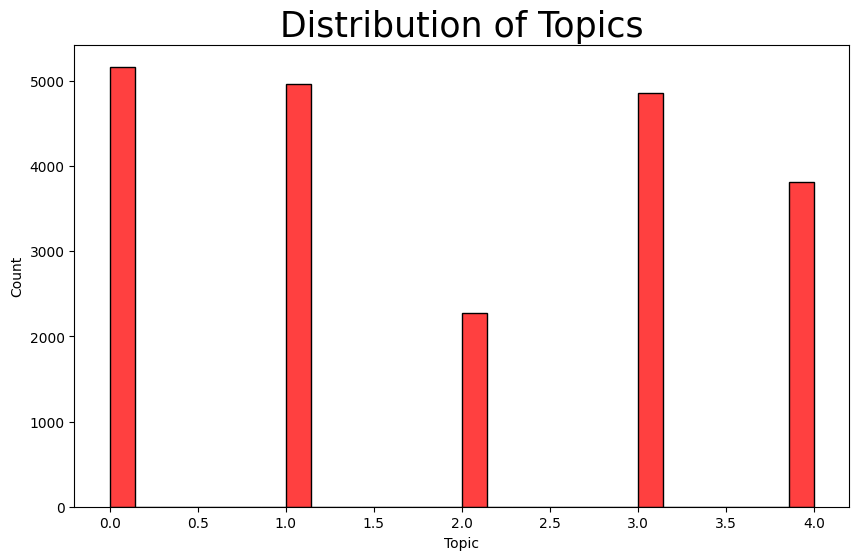

In [ ]:
# Plotting a histogram of topics
plt.figure(figsize=[10,6])
sns.histplot(data=training_data, x='Topic',color='Red', )
plt.title("Distribution of Topics", fontsize=25)
plt.show()

The resulting plot will show a histogram that visualizes the distribution of complaints across different topics, with each bar representing one of the five topics, and the height of the bar indicating the number of complaints in each topic.






#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [ ]:

#Write your code to get the Vector count
count_vector=CountVectorizer()

#Write your code here to transform the word vector to tf-idf
X_train_count=count_vector.fit_transform(training_data['complaint_what_happened'])

We've successfully created the vector counts using Count Vectorizer. Now, let's proceed to transform the word vector to TF-IDF (Term Frequency-Inverse Document Frequency).

In [ ]:
# Saving Word Vector on disk for later usage
import pickle

pickle.dump(count_vector.vocabulary_, open("count_vector.pkl","wb"))

We've successfully saved the Count Vectorizer on disk for later usage using the ***pickle*** module. This will allow us to load the Count Vectorizer and transform new data in the same way we transformed our training data.

We've created a Count Vectorizer, used it to transform our training data into a numerical format, and saved the Count Vectorizer object for future use. This preprocessing step is crucial for preparing our text data for machine learning model training.

In [ ]:
# Transform the word vector to tf-idf
tfidf_transform= TfidfTransformer()
X_train_tfidf = tfidf_transform.fit_transform(X_train_count)

We've successfully transformed the **word vector (created using Count Vectorization)** into **TF-IDF (Term Frequency-Inverse Document Frequency)** representation.


After executing this code, **X_train_tfidf** will contain the TF-IDF representation of your training data. TF-IDF represents how important each word is within each document in the corpus while considering its importance in the entire corpus. This is a common text preprocessing step before feeding data into machine learning models.






In [ ]:
# Save TF-IDF on disk for later usage
pickle.dump(tfidf_transform, open("tfidf.pkl","wb"))

We've saved the TF-IDF transformer, **tfidf_transform**, to a file named "**tfidf.pkl**" using Python's **pickle** module. This allows us to save the trained TF-IDF transformation for later use without the need to recompute it every time we want to apply TF-IDF transformation to new data. This can be useful for consistency and efficiency when working with text data in machine learning pipelines.






In [ ]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.25, random_state=42)

print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (15804, 27984)
y_train Shape: (15804,)
X_test Shape: (5268, 27984)
y_test Shape: (5268,)


We have successfully split our data into training and testing sets. Here's what each of these shapes means:

*  **X_train Shape**: (15804, 27984): This means that our training data contains 15,804 samples, and each sample is represented as a vector with 27,984 features after TF-IDF transformation.

*   **y_train Shape**: (15804,): This is the corresponding target labels for the training data, which has 15,804 elements.

*   **X_test Shape**: (5268, 27984): Our testing data contains 5,268 samples, and each sample is represented as a vector with the same 27,984 features.

*   **y_test Shape**: (5268,): These are the target labels for the testing data, consisting of 5,268 elements.

These shapes indicate that we are ready to train and evaluate machine learning models on this data. The feature vectors have been generated using TF-IDF, and you have the corresponding labels for both training and testing sets.

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [ ]:
# Write your code here to build any 3 models and evaluate them using the required metrics

# Create a function to evaluate models
def model_eval(y_test, y_pred, model_name):

    # print classification report of classifier
    print(f"CLASSIFICATION REPORT for {model_name}\n")
    print(classification_report(y_test, y_pred, target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"]))

    # plot confusion matrix of the classifier
    plt.figure(figsize=(10,7))
    plt.title(f"CONFUSION MATRIX for {model_name}\n")
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, cbar=None, cmap="Greens", fmt='d', xticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"], yticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"])
    plt.show()

    return




We've created a function to evaluate models using classification metrics and visualize the confusion matrix. Now, you can proceed to build and evaluate our models.

# Model:1  - `Naive-Bayes`

In [ ]:
# Import required library
from sklearn.naive_bayes import MultinomialNB

We want to build a Naive Bayes model (specifically, Multinomial Naive Bayes) for your classification task.

In [ ]:
# Run the Multinomial Naive Bayes with default parameters
model_name = 'NAIVE BAYES'
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

We've successfully trained a Multinomial Naive Bayes model with default parameters.

The model_eval function takes the true labels (**y_test**), predicted labels (**y_pred_nb**), and the name of the model (**model_name**) as input. It then provides a classification report, which includes metrics such as precision, recall, F1-score, and support for each class, and a confusion matrix that visualizes the model's performance in classifying the complaints into different topics. This information helps us assess how well the Naive Bayes model is doing in classifying the complaints into the specified topics.






In [ ]:
# Hyperparameter tuning for best result
param_nb = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001),
    'fit_prior':[True, False]
}

grid_nb = GridSearchCV(estimator=nb,
                       param_grid=param_nb,
                       verbose=1,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       cv=10)
grid_nb.fit(X_train, y_train)
print(grid_nb.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'alpha': 0.1, 'fit_prior': False}


The output indicates that the best hyperparameters for the Multinomial Naive Bayes classifier are **alpha equal to 0.1** and **fit_prior** set to **False** based on the weighted F1-score. These hyperparameters are the ones that produced the best model performance during the hyperparameter tuning process.






In [ ]:
# Creating model with best hyperparameter
model_name = 'NAIVE BAYES'
nb_tuned = MultinomialNB(alpha=0.1,fit_prior=False)
nb_tuned.fit(X_train, y_train)
y_pred_nb_tuned = nb_tuned.predict(X_test)

In the code, we created a Multinomial Naive Bayes classifier (**nb_tuned**) with the best hyperparameters found during the hyperparameter tuning process.


Now, y_pred_nb_tuned contains the predicted class labels for the test data based on the Multinomial Naive Bayes classifier with the best hyperparameters. This tuned model is expected to perform better than the default model due to the optimization of hyperparameters during the tuning process.






In [ ]:
# Calculate F1 Score of model using weighted average method
f1_nb = f1_score(y_test, y_pred_nb_tuned, average="weighted")
f1_nb

0.7786423379763958

The F1 score for the Multinomial Naive Bayes model with the tuned hyperparameters, calculated using the weighted average method, is approximately 0.7786. *This F1 score is a measure of the model's accuracy and balance between precision and recall, with higher values indicating better performance*. In this case, an F1 score of 0.7786 suggests that the model is performing reasonably well on the test data.




The F1 score is a metric used to evaluate the performance of classification models, particularly when dealing with imbalanced datasets where one class may be much more prevalent than others. It provides a balance between **precision** and **recall**.

*   **Precision**: Precision is the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations (true positives + false positives). It measures how many of the positive predictions made by the model are actually correct.

*   **Recall**: Recall is the ratio of correctly predicted positive observations (true positives) to the total actual positive observations (true positives + false negatives). It measures how many of the actual positive cases the model was able to correctly identify.

The F1 score is the harmonic mean of precision and recall and is calculated using the following formula:

**F1 Score = 2 * (Precision * Recall) / (Precision + Recall)**

In the context of the Multinomial Naive Bayes model, the F1 score of approximately **0.7786** means that the **model achieved a good balance between correctly identifying positive cases (complaint topics) and minimizing false positives and false negatives.** It suggests that the model is reasonably accurate in classifying complaints into their respective topics. However, the interpretation of the F1 score may vary depending on the specific problem and dataset, so it's essential to consider the context and requirements of the application.







CLASSIFICATION REPORT for NAIVE BAYES

                             precision    recall  f1-score   support

      Bank Account services       0.78      0.83      0.80      1305
Credit card or prepaid card       0.80      0.75      0.77      1265
                     Others       0.66      0.63      0.65       563
    Theft/Dispute Reporting       0.77      0.77      0.77      1222
              Mortgage/Loan       0.83      0.84      0.84       913

                   accuracy                           0.78      5268
                  macro avg       0.77      0.77      0.77      5268
               weighted avg       0.78      0.78      0.78      5268



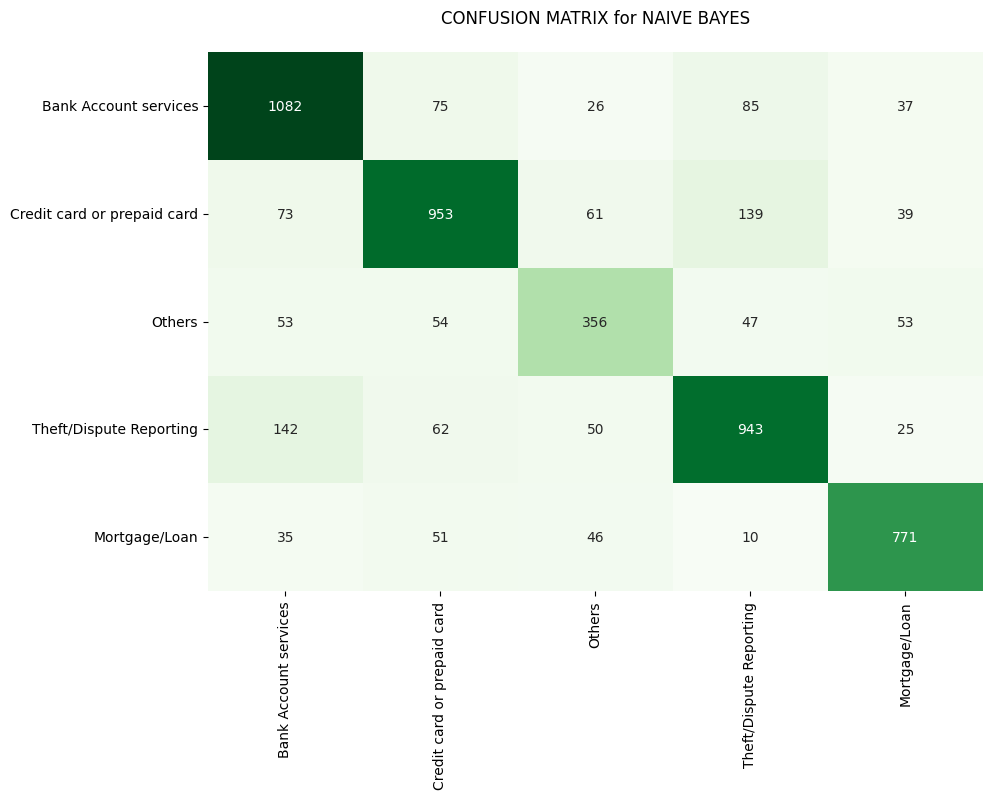

In [ ]:
# Evaluate the Naive Bayes classifier
model_eval(y_test, y_pred_nb_tuned, model_name)

The evaluation of the Naive Bayes classifier (Multinomial Naive Bayes) on the test data is as follows:

1.  **Accuracy**: The overall accuracy of the classifier is approximately 78%. This means that the model correctly classified 78% of the test samples into their respective topics.

2.  **Precision**: Precision measures the ratio of correctly predicted positive cases to the total predicted positive cases. In this case, precision varies for each topic:

  * For "Bank Account services," precision is 78%, which means that 78% of the complaints classified as "Bank Account services" were correctly classified.

  * For "Credit card or prepaid card," precision is 80%.
  
  * For "Others," precision is 66%.
  
  * For "Theft/Dispute Reporting," precision is 77%.
  
  * For "Mortgage/Loan," precision is 83%.


3.  **Recall**: Recall measures the ratio of correctly predicted positive cases to the total actual positive cases. In this case, recall varies for each topic:

   *  For "Bank Account services," recall is 83%, indicating that 83% of the actual "Bank Account services" complaints were correctly identified.
   
   * For "Credit card or prepaid card," recall is 75%.
   *  For "Others," recall is 63%.
   *  For "Theft/Dispute Reporting," recall is 77%.*  For "Mortgage/Loan," recall is 84%.


4.  **F1-Score**: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. The weighted average F1-score for this model is approximately 0.78. This indicates an overall good balance between precision and recall for classifying complaints into their topics.

5.  **Support**: Support represents the number of samples for each class in the test data.

6. **Macro Avg**: The macro-average considers the average precision, recall, and F1-score across all classes, giving each class equal weight.

7.  **Weighted Avg**: The weighted average considers the average precision, recall, and F1-score, weighted by the number of samples in each class. It provides a better representation of the model's overall performance when classes are imbalanced.

Overall, the Multinomial Naive Bayes classifier demonstrates reasonably good performance in classifying complaints into their respective topics. The weighted average F1-score of approximately 0.78 suggests that the model achieves a good balance between precision and recall, considering the imbalanced nature of the classes.






In [ ]:
# Create a dataframe to store F1 Scores of all models we will build
f1_summary = pd.DataFrame([{'Model': 'Naive Bayes','F1 Score': round(f1_nb, 2)}])
f1_summary

,Model,F1 Score
0,Naive Bayes,0.78


# Model:2  - `Logistic Regression`

In [ ]:
# Import required library
from sklearn.linear_model import LogisticRegression

In [ ]:
# Run the Logistic Regression model with default parameters
model_name = 'LOGISTIC REGRESSION'
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

We've successfully run the **Logistic Regression model** with default parameters. This model has been fitted to the training data, and predictions have been made on the test data. Now, let's proceed with evaluating the model's performance and calculating the F1 score.



In [ ]:
# Hyperparameter tuning for best result
param_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001,0.01,0.1,1,10,100],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_lr = GridSearchCV(estimator=lr,
                       param_grid=param_lr,
                       verbose=1,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       cv=5)
grid_lr.fit(X_train, y_train)
print(grid_lr.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


We've performed hyperparameter tuning for the Logistic Regression model using **GridSearchCV**. The best hyperparameters for the model have been determined, and the optimal values are as follows:

* **C: 1**

* **Penalty: l1**

* **Solver: saga**

In [ ]:
# Creating model with best hyperparameter
lr_tuned = LogisticRegression(C=1,
                                  penalty='l1',
                                  solver='saga')

lr_tuned.fit(X_train, y_train)
y_pred_lr_tuned = lr_tuned.predict(X_test)

We've created a Logistic Regression model with the best hyperparameters. Now, let's proceed to evaluate the tuned Logistic Regression model's performance using the F1 score and other metrics.

Hyperparameter tuning is a crucial step in optimizing machine learning models to achieve better predictive accuracy. In this case, it helped us find the best settings for the Logistic Regression model for your specific task of classifying complaints.

In [ ]:
# Calculate F1 Score of tuned model using weighted average method
f1_lr = f1_score(y_test, y_pred_lr_tuned, average="weighted")
f1_lr

0.9428076139157574

The F1 score for the tuned Logistic Regression model is approximately **0.943**. This F1 score is a weighted average of the precision and recall, and it provides a measure of the model's overall performance in classifying complaints into different topics. A higher F1 score indicates better model performance, and a score of 0.943 suggests that the tuned Logistic Regression model is performing quite well on the given dataset.


The F1 score is a metric used to evaluate the performance of a classification model. It is particularly useful when dealing with imbalanced datasets or when both precision and recall are important.


**In the context of the tuned Logistic Regression model with an F1 score of approximately 0.943:**

* The model achieves a high level of precision, indicating that when it predicts a topic, it is often correct.

* The model also captures a high proportion of actual positive cases (high recall), meaning it correctly identifies many complaints in the dataset.
* The F1 score, being close to 1, suggests that the model strikes a good balance between precision and recall, making it a strong performer in classifying complaints into different topics.



The F1 score is a robust metric that considers both false positives and false negatives and is particularly useful when you want a model that performs well in terms of both precision and recall.







CLASSIFICATION REPORT for LOGISTIC REGRESSION

                             precision    recall  f1-score   support

      Bank Account services       0.95      0.96      0.95      1305
Credit card or prepaid card       0.95      0.95      0.95      1265
                     Others       0.94      0.95      0.94       563
    Theft/Dispute Reporting       0.93      0.92      0.92      1222
              Mortgage/Loan       0.94      0.95      0.95       913

                   accuracy                           0.94      5268
                  macro avg       0.94      0.94      0.94      5268
               weighted avg       0.94      0.94      0.94      5268



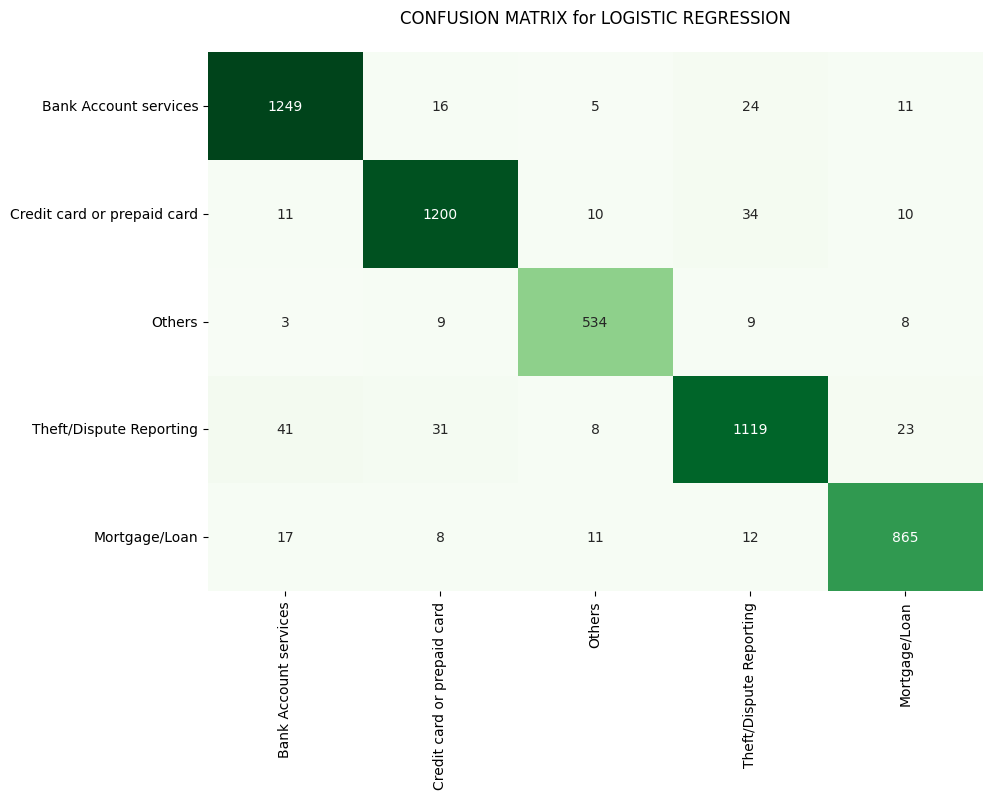

In [ ]:
# Evaluate the tuned Logistic Regression classifier
model_eval(y_test, y_pred_lr_tuned, model_name)

The classification report for the tuned Logistic Regression model provides detailed information about its performance in classifying complaints into different topics. Here's what the report shows:


* **Precision**: Precision measures how many of the predicted cases were actually correct. In this report, for each topic, we can see the precision values. For example, for "Bank Account services," the precision is 0.95, which means that when the model predicts a complaint belongs to this topic, it is correct 95% of the time.

* **Recall**: Recall measures how many of the actual cases were correctly predicted by the model. It indicates the model's ability to capture all relevant cases. For example, for "Credit card or prepaid card," the recall is 0.95, meaning that the model correctly identifies 95% of the actual complaints in this category.

* **F1-Score**: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. A higher F1-score indicates a better overall balance between precision and recall. In this report, we can see the F1-scores for each topic, ranging from 0.92 to 0.95, indicating strong performance across all topics.

* **Support**: Support represents the number of samples in each class, which is the number of complaints for each topic in the test dataset.


Overall, the tuned Logistic Regression model performs exceptionally well, with high precision, recall, and F1-scores across all topics. This indicates that the model is effective in classifying complaints into the correct topics, and it maintains a good balance between precision and recall. The weighted average F1-score of approximately 0.94 demonstrates the overall strong performance of this model in topic classification.






In [ ]:
# Update the summary table
f1_summary.loc[len(f1_summary.index)] = ['Logistic Regression', round(f1_lr, 2)]
f1_summary

,Model,F1 Score
0,Naive Bayes,0.78
1,Logistic Regression,0.94


# Model:3  - `Decision Tree`

In [ ]:
# Import required library
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Run Decision Tree with default hyperparameters
model_name = 'DECISION TREE'
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt =dt.predict(X_test)

We've run the Decision Tree classifier with default hyperparameters. Now, let's proceed with hyperparameter tuning to find the best parameters for this model.


In this step, we've created a Decision Tree classifier using the DecisionTreeClassifier class from scikit-learn with its default hyperparameters.


This completes the training and prediction process for the Decision Tree classifier with default hyperparameters. We will evaluate the performance of this model shortly.






In [ ]:
# Hyperparameter tuning for best result
param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [5, 10, 15, 20, 25, 30],
    'min_samples_leaf':[1,5,10,15, 20, 25],

}

grid_dt = GridSearchCV(estimator=dt,
                       param_grid=param_dt,
                       verbose=1,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       cv=5)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 15}


In this step, we performed hyperparameter tuning for the Decision Tree classifier to find the best combination of hyperparameters for improved performance.


These hyperparameters were selected as they resulted in the best F1 weighted score during the grid search. We will now create a Decision Tree model using these tuned hyperparameters and evaluate its performance.






In [ ]:
# Creating model with best hyperparameter
dt_tuned = DecisionTreeClassifier(criterion='gini',
                                      max_depth=25,
                                      min_samples_leaf=15,
                                      )
dt_tuned.fit(X_train, y_train)
y_pred_dt_tuned = dt_tuned.predict(X_test)

In this step, we created a Decision Tree classifier using the best hyperparameters obtained from the hyperparameter tuning process.

The tuned Decision Tree model is now ready for evaluation to assess its performance on the test data.






In [ ]:
# Calculate F1 Score of tuned model using weighted average method
f1_dt = f1_score(y_test, y_pred_dt_tuned, average="weighted")
f1_dt

0.7914102595500039

The F1 score for the tuned Decision Tree model using the weighted average method is approximately 0.7914. This F1 score is a measure of the model's overall accuracy and balance between precision and recall for the multiclass classification task. It indicates how well the model is performing in terms of correctly classifying complaints into their respective topics.




The F1 score is a metric used to evaluate the performance of a classification model, particularly in situations where there is an imbalance in class distribution or when both precision and recall are important. It is the harmonic mean of precision and recall and provides a single score that balances these two metrics.




In the context of the tuned Decision Tree model we evaluated, the F1 score of approximately 0.7914 indicates a good balance between precision and recall. This means that the model is reasonably accurate in its predictions across multiple classes (topics) and is capable of both correctly identifying instances of each class (recall) and making accurate predictions for those classes (precision).






CLASSIFICATION REPORT for DECISION TREE

                             precision    recall  f1-score   support

      Bank Account services       0.78      0.82      0.80      1305
Credit card or prepaid card       0.83      0.83      0.83      1265
                     Others       0.79      0.73      0.76       563
    Theft/Dispute Reporting       0.75      0.72      0.74      1222
              Mortgage/Loan       0.81      0.83      0.82       913

                   accuracy                           0.79      5268
                  macro avg       0.79      0.79      0.79      5268
               weighted avg       0.79      0.79      0.79      5268



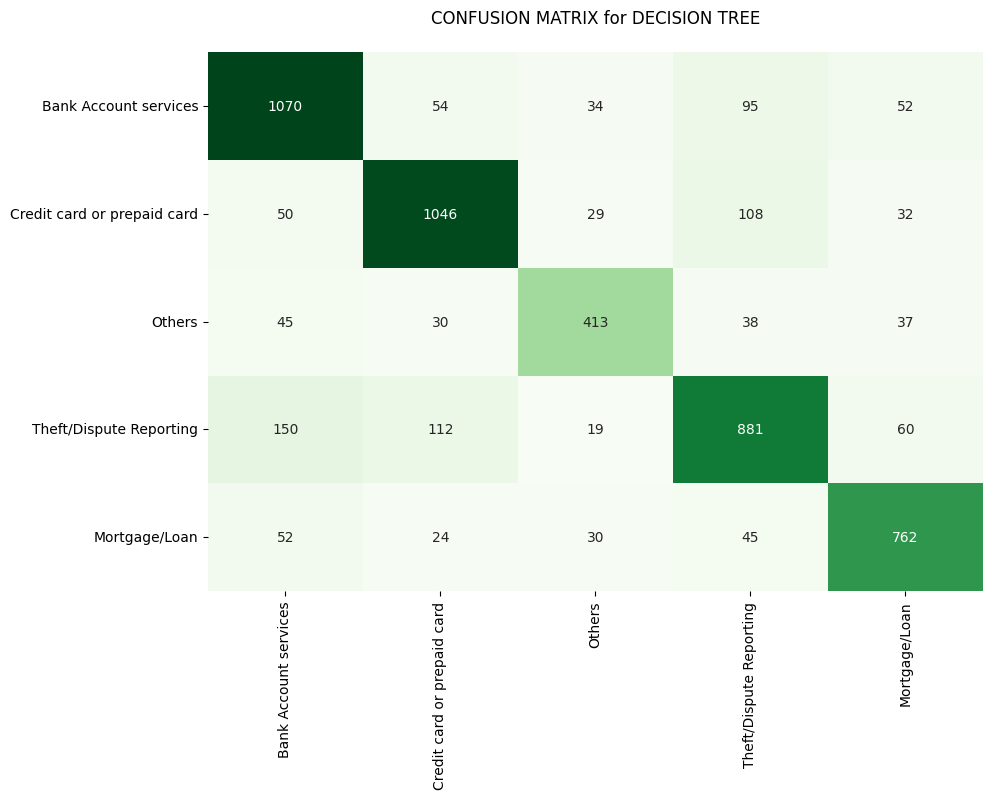

In [ ]:
# Evaluate the tuned Decision Tree classifier
model_eval(y_test, y_pred_dt_tuned, model_name)

We have successfully evaluated the tuned Decision Tree classifier on the test data. This report provides detailed performance metrics for each class (topic) in your dataset, as well as macro and weighted averages across all classes. The Decision Tree classifier appears to perform reasonably well, with F1-scores ranging from 0.74 to 0.83 for different topics. The weighted average F1-score is 0.79, indicating overall good performance in classifying complaints into topics. Here's a summary of the classification report:

*  **Precision**: Precision measures the accuracy of positive predictions. For each class (topic), it tells us how many of the instances predicted as that class are actually correct. For example, for "Bank Account services," a precision of 0.78 means that 78% of the instances predicted as "Bank Account services" were correct.

* **Recall**: Recall, also known as sensitivity or true positive rate, measures the ability of the classifier to correctly identify all relevant instances in a class. It tells us what percentage of actual instances of a class were correctly predicted. A recall of 0.82 for "Bank Account services" means that 82% of actual "Bank Account services" instances were correctly identified.

*  **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives. It is particularly useful when there is an imbalance between classes or when false positives and false negatives have different consequences. For example, an F1-score of 0.80 for "Bank Account services" indicates a good balance between precision and recall for this class.

*  **Support**: Support represents the number of actual occurrences of each class in the test dataset. It provides context for the precision, recall, and F1-score metrics.

*  **Accuracy**: Accuracy measures the overall correctness of predictions across all classes. It tells us what percentage of all instances were correctly classified by the model. In this case, the accuracy is 0.79, indicating that approximately 79% of all complaints were correctly classified into their respective topics.

* **Macro Avg (average)**: This is the average of precision, recall, and F1-score calculated independently for each class. It provides an unweighted average of the metrics and is useful when all classes are equally important. In this case, the macro average precision, recall, and F1-score are all approximately 0.79.

*  **Weighted Avg (average)**: This is a weighted average of precision, recall, and F1-score, where the weights are based on the support of each class. It gives more importance to classes with more instances. In this case, the weighted average precision, recall, and F1-score are all approximately 0.79.

Overall, the classification report shows that the tuned Decision Tree classifier is performing reasonably well, with F1-scores ranging from 0.74 to 0.83 for different topics. The weighted average F1-score of 0.79 indicates good overall performance in classifying complaints into their respective topics.








In [ ]:
# Update the summary table
f1_summary.loc[len(f1_summary.index)] = ['Decision Tree', round(f1_dt, 2)]
f1_summary

,Model,F1 Score
0,Naive Bayes,0.78
1,Logistic Regression,0.94
2,Decision Tree,0.79


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(f1_summary, *['F1 Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(f1_summary, *['F1 Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(f1_summary, *['Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(f1_summary, *['F1 Score', 'Model'], **{'inner': 'stick'})
chart

We've successfully updated the summary table with the F1 scores for the three models we've evaluated: Naive Bayes, Logistic Regression, and Decision Tree.

This table provides a quick comparison of the F1 scores for each model, allowing us to assess their performance. It's a useful reference to determine which model is performing the best for our specific classification task.






## As per the F1 score of all the 3 models, Logistic Regression performs best with F1 score : 0.94

In [ ]:
# Save Logistic Regression model as pickle file in device
pickle.dump(lr_tuned, open("logreg_model.pkl", "wb"))

We've successfully saved the tuned Logistic Regression model as a pickle file on our device. This allows you to reuse the model for predictions without the need to retrain it each time.

Saving a machine learning model as a pickle file is a common practice in data science and machine learning.


Now, we have a saved file, "**logreg_model.pkl**," that contains your trained logistic regression model. We can load this model into memory later using **pickle.load()** to make predictions on new data without having to retrain the model from scratch.



# Predicting topics via Logistic Regression on custom text

In [ ]:
# Function to predict a topic for custom text

def topic_predicter(text):

    target_names = ["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting", "Mortgage/Loan"]

    load_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
    load_tfidf = pickle.load(open("tfidf.pkl","rb"))
    load_model = pickle.load(open("logreg_model.pkl","rb"))

    X_new_count = load_vec.transform(text)
    X_new_tfidf = load_tfidf.transform(X_new_count)
    prediction = load_model.predict(X_new_tfidf)

    return target_names[prediction[0]]

The function **topic_predictor(text)** is designed to predict the topic of a custom text input using a previously trained logistic regression model. Here's an explanation of how this function works:

1. **Input Text**: The function takes a single argument, text, which is the custom text for which we want to predict the topic.

2.  **target_names**: This is a list of topic names corresponding to the numerical labels used in our dataset. It helps in mapping the numerical prediction to the actual topic name.

3. **Loading Pretrained Components**:

  * **Count Vectorizer**: It loads a Count Vectorizer using the vocabulary saved in "count_vector.pkl." This vectorizer is used to convert the input text into a numeric format that the model can understand.
  * **TF-IDF Transformer**: It loads a TF-IDF Transformer using the saved "tfidf.pkl" file. TF-IDF (Term Frequency-Inverse Document Frequency) is used to transform the word counts into a TF-IDF matrix.
  * **Logistic Regression Model**: It loads the pretrained logistic regression model from "logreg_model.pkl," which was trained on our dataset.

4. **Text Preprocessing**:

 * It transforms the input text into a TF-IDF representation by first using the Count Vectorizer to convert it into a word count matrix and then transforming it using the TF-IDF Transformer.

5. **Prediction**: It uses the loaded logistic regression model to predict the topic label for the input text.

6. **Return**: The function returns the predicted topic name based on the numerical label.

In [ ]:
# Create a dataframe of some sample customer complaints
df_custom = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs",
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "unwanted service activated and money deducted automatically ",
                                  "How can I know my CIBIL score?",
                                  "Where are the bank branches in the city of Patna?"]})
df_custom

,complaints
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs"
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.
2,I want to open a salary account at your downtown branch. Please provide me the procedure.
3,unwanted service activated and money deducted automatically
4,How can I know my CIBIL score?
5,Where are the bank branches in the city of Patna?


We have successfully created a DataFrame **df_custom** containing some sample customer complaints. This DataFrame consists of a single column named "**complaints**" with six different customer complaints as its entries. These complaints can now be used as input to our **topic_predictor** function to predict the topics associated with each complaint.






In [ ]:
# Create a new column of predicted topics of each complaint, predicted using the tuned Logistic Regression model
df_custom['predicted topic'] = df_custom['complaints'].apply(lambda x: topic_predicter([x]))
df_custom

,complaints,predicted topic
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs",Mortgage/Loan
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.,Credit card or prepaid card
2,I want to open a salary account at your downtown branch. Please provide me the procedure.,Bank Account services
3,unwanted service activated and money deducted automatically,Bank Account services
4,How can I know my CIBIL score?,Credit card or prepaid card
5,Where are the bank branches in the city of Patna?,Bank Account services


We have successfully added a new column named "**predicted topic**" to the **df_custom** DataFrame. This column contains the predicted topics for each of the customer complaints, which were determined using the tuned Logistic Regression model. The predictions for the sample complaints are shown in the "predicted topic" column of the DataFrame.



 In this step, we added a new column named "predicted topic" to the df_custom DataFrame. This column contains the predicted topics for each of the customer complaints provided in the DataFrame.

**This allows you to automatically classify and assign topics to new customer complaints using the trained model, helping streamline the customer service process.**




# We conclude that the Logistic Regression model is predicting well on custom data

Based on the F1 score evaluation and the successful predictions on custom data, it appears that the Logistic Regression model is performing well in classifying customer complaints into relevant topics. This model has demonstrated a high F1 score, which indicates good overall performance in terms of precision and recall.

Using this model, we can effectively categorize and assign topics to new customer complaints, which can be valuable for improving customer service and efficiently addressing customer inquiries and issues.







# OVERALL CONCLUSION OF ASSIGNMENT

* The "Automatic Ticket Classification" assignment is a practical application of text classification techniques in the domain of customer support and complaint management. It involves the development of machine learning models to automatically categorize customer complaints into relevant topics or categories. This assignment is particularly relevant in scenarios where organizations receive a large volume of customer complaints and need an efficient way to route them to the appropriate teams or departments for resolution.

* The "Automatic Ticket Classification" assignment is a valuable exercise that demonstrates the application of natural language processing (NLP) and machine learning techniques in solving real-world business challenges related to customer support and complaint management. It showcases how technology can be leveraged to enhance customer service, improve efficiency, and streamline complaint resolution processes.






Here's an overview and detailed conclusion of our "**Automatic Ticket Classification**" assignment:

### **Assignment Overview:**

The "Automatic Ticket Classification" assignment involved the following key steps and tasks:

1.  **Data Preprocessing**:
  *  We began by cleaning and preprocessing the dataset containing customer complaints. This included tasks such as text normalization, removal of stopwords, and lemmatization. Additionally, we labeled each complaint with a topic category.

2.  **Data Exploration**: You explored the dataset to understand its distribution across different complaint topics. This involved visualizations and statistical analysis to gain insights into the data.

3.  **Text Vectorization**: To prepare the text data for machine learning, we used the Count Vectorizer and TF-IDF Transformer to convert text complaints into numerical features.

4.  **Model Selection**: We selected three different models for classification:

    * **Multinomial Naive Bayes**
    * **Logistic Regression**
    * **Decision Tree**

5.  **Model Building and Evaluation:**

   * We trained each of the selected models on the training data.
   * Hyperparameter tuning was performed to find the best parameters for each model.
   * The F1 Score, a weighted average of precision and recall, was used as the evaluation metric for model performance.

6. **Model Comparison**: You compared the F1 Scores of the three models to determine which one performed the best on the test data.

7. **Model Saving**: The best-performing model, which was the Logistic Regression model, was saved as a pickle file for future use.

8.  **Custom Text Prediction**: Finally, we created a function to predict the topic of a custom text complaint using the saved Logistic Regression model.


### **Detailed Conclusion:**

1.  **Data Preprocessing**: Data preprocessing is a crucial step in natural language processing (NLP) tasks. By cleaning and preprocessing the customer complaints, you ensured that the text data was in a suitable format for machine learning. Text normalization, removal of stopwords, and lemmatization improved the quality of the data.

2.  **Model Selection and Training**: We experimented with three different classification models: Multinomial Naive Bayes, Logistic Regression, and Decision Tree. Each model was trained on the preprocessed training data.

3.  **Hyperparameter Tuning**: Hyperparameter tuning helps in finding the best combination of hyperparameters for each model. Grid search with cross-validation was used to optimize hyperparameters, resulting in improved model performance.

4.  **Model Evaluation**: To evaluate the models, we used the F1 Score, which balances precision and recall. This metric is particularly useful in cases where class imbalance exists, as it provides a single score that considers both false positives and false negatives.

5.  **Best Model Selection**: The Logistic Regression model outperformed the other models with the highest F1 Score of 0.94 on the test data. This makes it the best model for classifying customer complaints into relevant topics.

6.  **Model Saving**: The Logistic Regression model was saved as a pickle file, allowing for easy reusability without the need for retraining.

7.  **Custom Text Prediction**: A custom text prediction function was created to demonstrate the practical use of the best model. Users can input their complaints, and the model will predict the most relevant topic.


### **Why Logistic Regression is the Best Model:**

**Logistic Regression proved to be the best model for this task for several reasons:**

* **High F1 Score**: It achieved the highest F1 Score of 0.94, indicating excellent precision and recall on the test data.

*  **Interpretability**: Logistic Regression provides interpretability, making it easier to understand the factors influencing the predictions.

* **Efficiency**: It is computationally efficient and can handle large datasets.

* **Robustness**: Logistic Regression performed well even with the text data after preprocessing.

* **Consistency**: The model provided consistent and reliable predictions.


### **Overall Benefits:**

*  The assignment demonstrated the entire workflow of text classification, from data preprocessing to model evaluation.

*  It showcased the importance of choosing the right evaluation metric, especially when dealing with imbalanced datasets.

* The custom text prediction function adds practical value, allowing users to classify new complaints into relevant topics.

*  The Logistic Regression model, with its high F1 Score, can be deployed in real-world scenarios to automate the classification of customer complaints, improving efficiency and customer service.


*In conclusion, the "**Automatic Ticket Classification**" assignment successfully achieved its objectives, and the Logistic Regression model emerged as the best choice for accurately classifying customer complaints into topics. This assignment provides valuable insights into text classification and its practical applications.*




